<img src="notebooks/img/upc-positiu.png" width="350" height="105" align="left">

<center> <h1> What's Most Important During The First Date? </h1> </center>
<center> <h3> An Analysis of Student Speed-Dating </h3> </center>


<center> <h5> Andrea Iglesias <br> MSc Student <br> andrea.iglesias@estudiantat.upc.edu </h5> </center>
<center> <h5> Emmanuel Werr <br> MSc Student <br> emmanuel.werr@estudiantat.upc.edu </h5> </center>

<center> <h4> Facultat d’Informàtica de Barcelona <br> Master of Data Science </h4> </center>



# Introduction

This report is about...

## Table of Contents
* [1. Exploration](#exploration)
    * [1.1 Raw Data Summary](#raw_data_summary)
        * [1.1.1 Descriptive Statistics](#descriptive_statistics)
        * [1.1.2 Visualization](#visualization)
* [2. Preprocessing](#preprocessing)
    * [2.1 Checking Data Consistency](#checking_data_consistency)
        * [](#)
    * [2.2 Investigating Outliers](#investigating_outliers)
        * [](#)
    * [2.3 Investigating Missing Values](#investigating_missing_values)
        * [2.3.1 Missingness Summary](#missingness_summary)
        * [2.3.1 Missingness Mechanism](#missingness_mechanism)
        * [2.3.2 Treatment of Missing Values](#treatment_of_missing_values)
        * [](#)
    * [2.4 Feature Normalization](#feature_normalization)
        * [](#)
* [3. Feature Selection](#feature_selection)
    * [3.1 Univariate Feature Selection](#...)
        * [](#)
    * [3.2 Greedy Feature Selection](#...)
        * [](#)
* [4. Predictive Modelling](#predictive_modelling)
    * [4.1 Logistic Regression](#logistic_regression)
        * [](#)
    * [4.2 Naive Bayes](#naive_bayes)
        * [](#)
    * [4.3 Linear Discriminant Analysis](#linear_discriminant_analysis)
        * [](#)
    * [4.4 Support Vector Machines](#support_vector_machines)
        * [](#)
    * [4.5 K-Nearest Neighbors](#k_nearest_neighbors)
        * [](#)
    * [4.6 Decision Trees](#decision_trees)
        * [](#)
    * [4.7 Random Forests](#random_forests)
        * [](#)
    * [4.8 AdaBoost](#adaboost)
        * [](#)
    * [4.9 XGBoost](#xgboost)
        * [](#)
* [5. Ensemble Voting Classifier](#ensemble_voting_classifier)
    * [5.1 ](#)

# Getting Started

In [1]:
## ---*--- Importing Necessary Packages ---*---
## setting up notebook environment for analysis

# Custom Packages
from src.feature_selection.univariate import UnivariateFeatureSelction
from src.modelling.ensemble_cv import train_classifier_ensemble_CV, get_clf_name
from src.modelling.ensemble_cv import plot_mean_feature_importances, plot_top_feature_importances
#from src.preprocessing import preprocess

# General Tools:
import os, sys  # standard python libraries
import pandas as pd
import numpy as np
import scipy
import itertools  # combinatorics toolkit
import time  # for obtaining computation execution times

# Data Pre-Processing:
from sklearn.preprocessing import StandardScaler  # for standardizing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model # BayesianRidge() model for iterative imputer
from collections import Counter  # object class for counting element occurences

# Machine Learning Classifiers:
from xgboost import XGBClassifier  # xgboost classifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron  # linear classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA classifier
from sklearn.svm import SVC  # support-vector machine classifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier  # decision tree classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier  # Nearest-Neighbors classifier
        
# Feature and Model Selection:
from statsmodels.stats.outliers_influence import variance_inflation_factor # detect multicollinearity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold  # train/test splitting tool for cross-validation
from sklearn.model_selection import GridSearchCV  # hyperparameter optimization tool via exhaustive search
from sklearn.model_selection import cross_val_score  # automates cross-validated scoring
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc  # scoring metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE  # recursive feature elimination
from sklearn.model_selection import learning_curve  # learning-curve generation for bias-variance tradeoff
from sklearn.model_selection import validation_curve  # for fine-tuning hyperparameters
from sklearn.pipeline import Pipeline

# Plotting:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

# Manage Warnings: 
import warnings
warnings.filterwarnings('ignore')

# set_option to display all columns of DF during preview summaries
pd.set_option('display.max_columns', None)

# 1. Exploration
This is chapter number 1

## 1.1 Raw Data Summary <a class="anchor" id="7"></a> 

### 1.1.1 Descriptive Statistics <a class="anchor" id="descriptive_statistics"></a>

In [2]:
# 
raw_df = pd.read_csv('./data/raw/raw_data.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: float64(59), int64(60), object(4)
memory usage: 7.9+ MB


From the output of the describe() method we can...

In [3]:
# 
raw_df.describe()

has_null         wave          age        age_o        d_age  \
count  8378.00000  8378.000000  8283.000000  8274.000000  8378.000000   
mean      0.87491    11.350919    26.358928    26.364999     4.185605   
std       0.33084     5.995903     3.566763     3.563648     4.596171   
min       0.00000     1.000000    18.000000    18.000000     0.000000   
25%       1.00000     7.000000    24.000000    24.000000     1.000000   
50%       1.00000    11.000000    26.000000    26.000000     3.000000   
75%       1.00000    15.000000    28.000000    28.000000     5.000000   
max       1.00000    21.000000    55.000000    55.000000    37.000000   

           d_d_age     samerace  importance_same_race  \
count  8378.000000  8378.000000           8299.000000   
mean      1.351755     0.395799              3.784793   
std       1.049246     0.489051              2.845708   
min       0.000000     0.000000              0.000000   
25%       0.000000     0.000000              1.000000   
50%       1.000000     0.000000              3.000000   
75%       2.000000     1.000000              6.000000   
max       3.000000     1.000000             10.000000   

       importance_same_religion  d_importance_same_race  \
count               8299.000000             8378.000000   
mean                   3.651645                0.940797   
std                    2.805237                0.791249   
min                    1.000000                0.000000   
25%                    1.000000                0.000000   
50%                    3.000000                1.000000   
75%                    6.000000                2.000000   
max                   10.000000                2.000000   

       d_importance_same_religion  pref_o_attractive  pref_o_sincere  \
count                 8378.000000        8289.000000     8289.000000   
mean                     0.897708          22.495347       17.396867   
std                      0.793712          12.569802        7.044003   
min                      0.000000           0.000000        0.000000   
25%                      0.000000          15.000000       15.000000   
50%                      1.000000          20.000000       18.370000   
75%                      2.000000          25.000000       20.000000   
max                      2.000000         100.000000       60.000000   

       pref_o_intelligence  pref_o_funny  pref_o_ambitious  \
count          8289.000000   8280.000000       8271.000000   
mean             20.270759     17.459714         10.685375   
std               6.782895      6.085526          6.126544   
min               0.000000      0.000000          0.000000   
25%              17.390000     15.000000          5.000000   
50%              20.000000     18.000000         10.000000   
75%              23.810000     20.000000         15.000000   
max              50.000000     50.000000         53.000000   

       pref_o_shared_interests  d_pref_o_attractive  d_pref_o_sincere  \
count              8249.000000          8378.000000       8378.000000   
mean                 11.845930             1.061590          0.812366   
std                   6.362746             0.808235          0.713371   
min                   0.000000             0.000000          0.000000   
25%                   9.520000             0.000000          0.000000   
50%                  10.640000             1.000000          1.000000   
75%                  16.000000             2.000000          1.000000   
max                  30.000000             2.000000          2.000000   

       d_pref_o_intelligence  d_pref_o_funny  d_pref_o_ambitious  \
count            8378.000000     8378.000000         8378.000000   
mean                1.110766        0.777035            0.214013   
std                 0.691289        0.698871            0.436935   
min                 0.000000        0.000000            0.000000   
25%                 1.000000        0.000000            0.000000   
50%                 1.000000   

### 1.1.2 Visualization <a class="anchor" id="visualization"></a>

In [4]:
personality_DF = raw_df[['like', 'attractive', 'attractive_o', 'funny', 'funny_o', 'intelligence', 'intelligence_o', 'shared_interests_o', 'match']].copy()
personality_DF.head()

like  attractive  attractive_o  funny  funny_o  intelligence  \
0   7.0         6.0           6.0    8.0      8.0           8.0   
1   7.0         6.0           7.0    8.0      7.0           8.0   
2   7.0         6.0          10.0    8.0     10.0           8.0   
3   7.0         6.0           7.0    8.0      8.0           8.0   
4   6.0         6.0           8.0    8.0      6.0           8.0   

   intelligence_o  shared_interests_o  match  
0             8.0                 6.0      0  
1            10.0                 5.0      0  
2            10.0                10.0      1  
3             9.0                 8.0      1  
4             9.0                 7.0      1

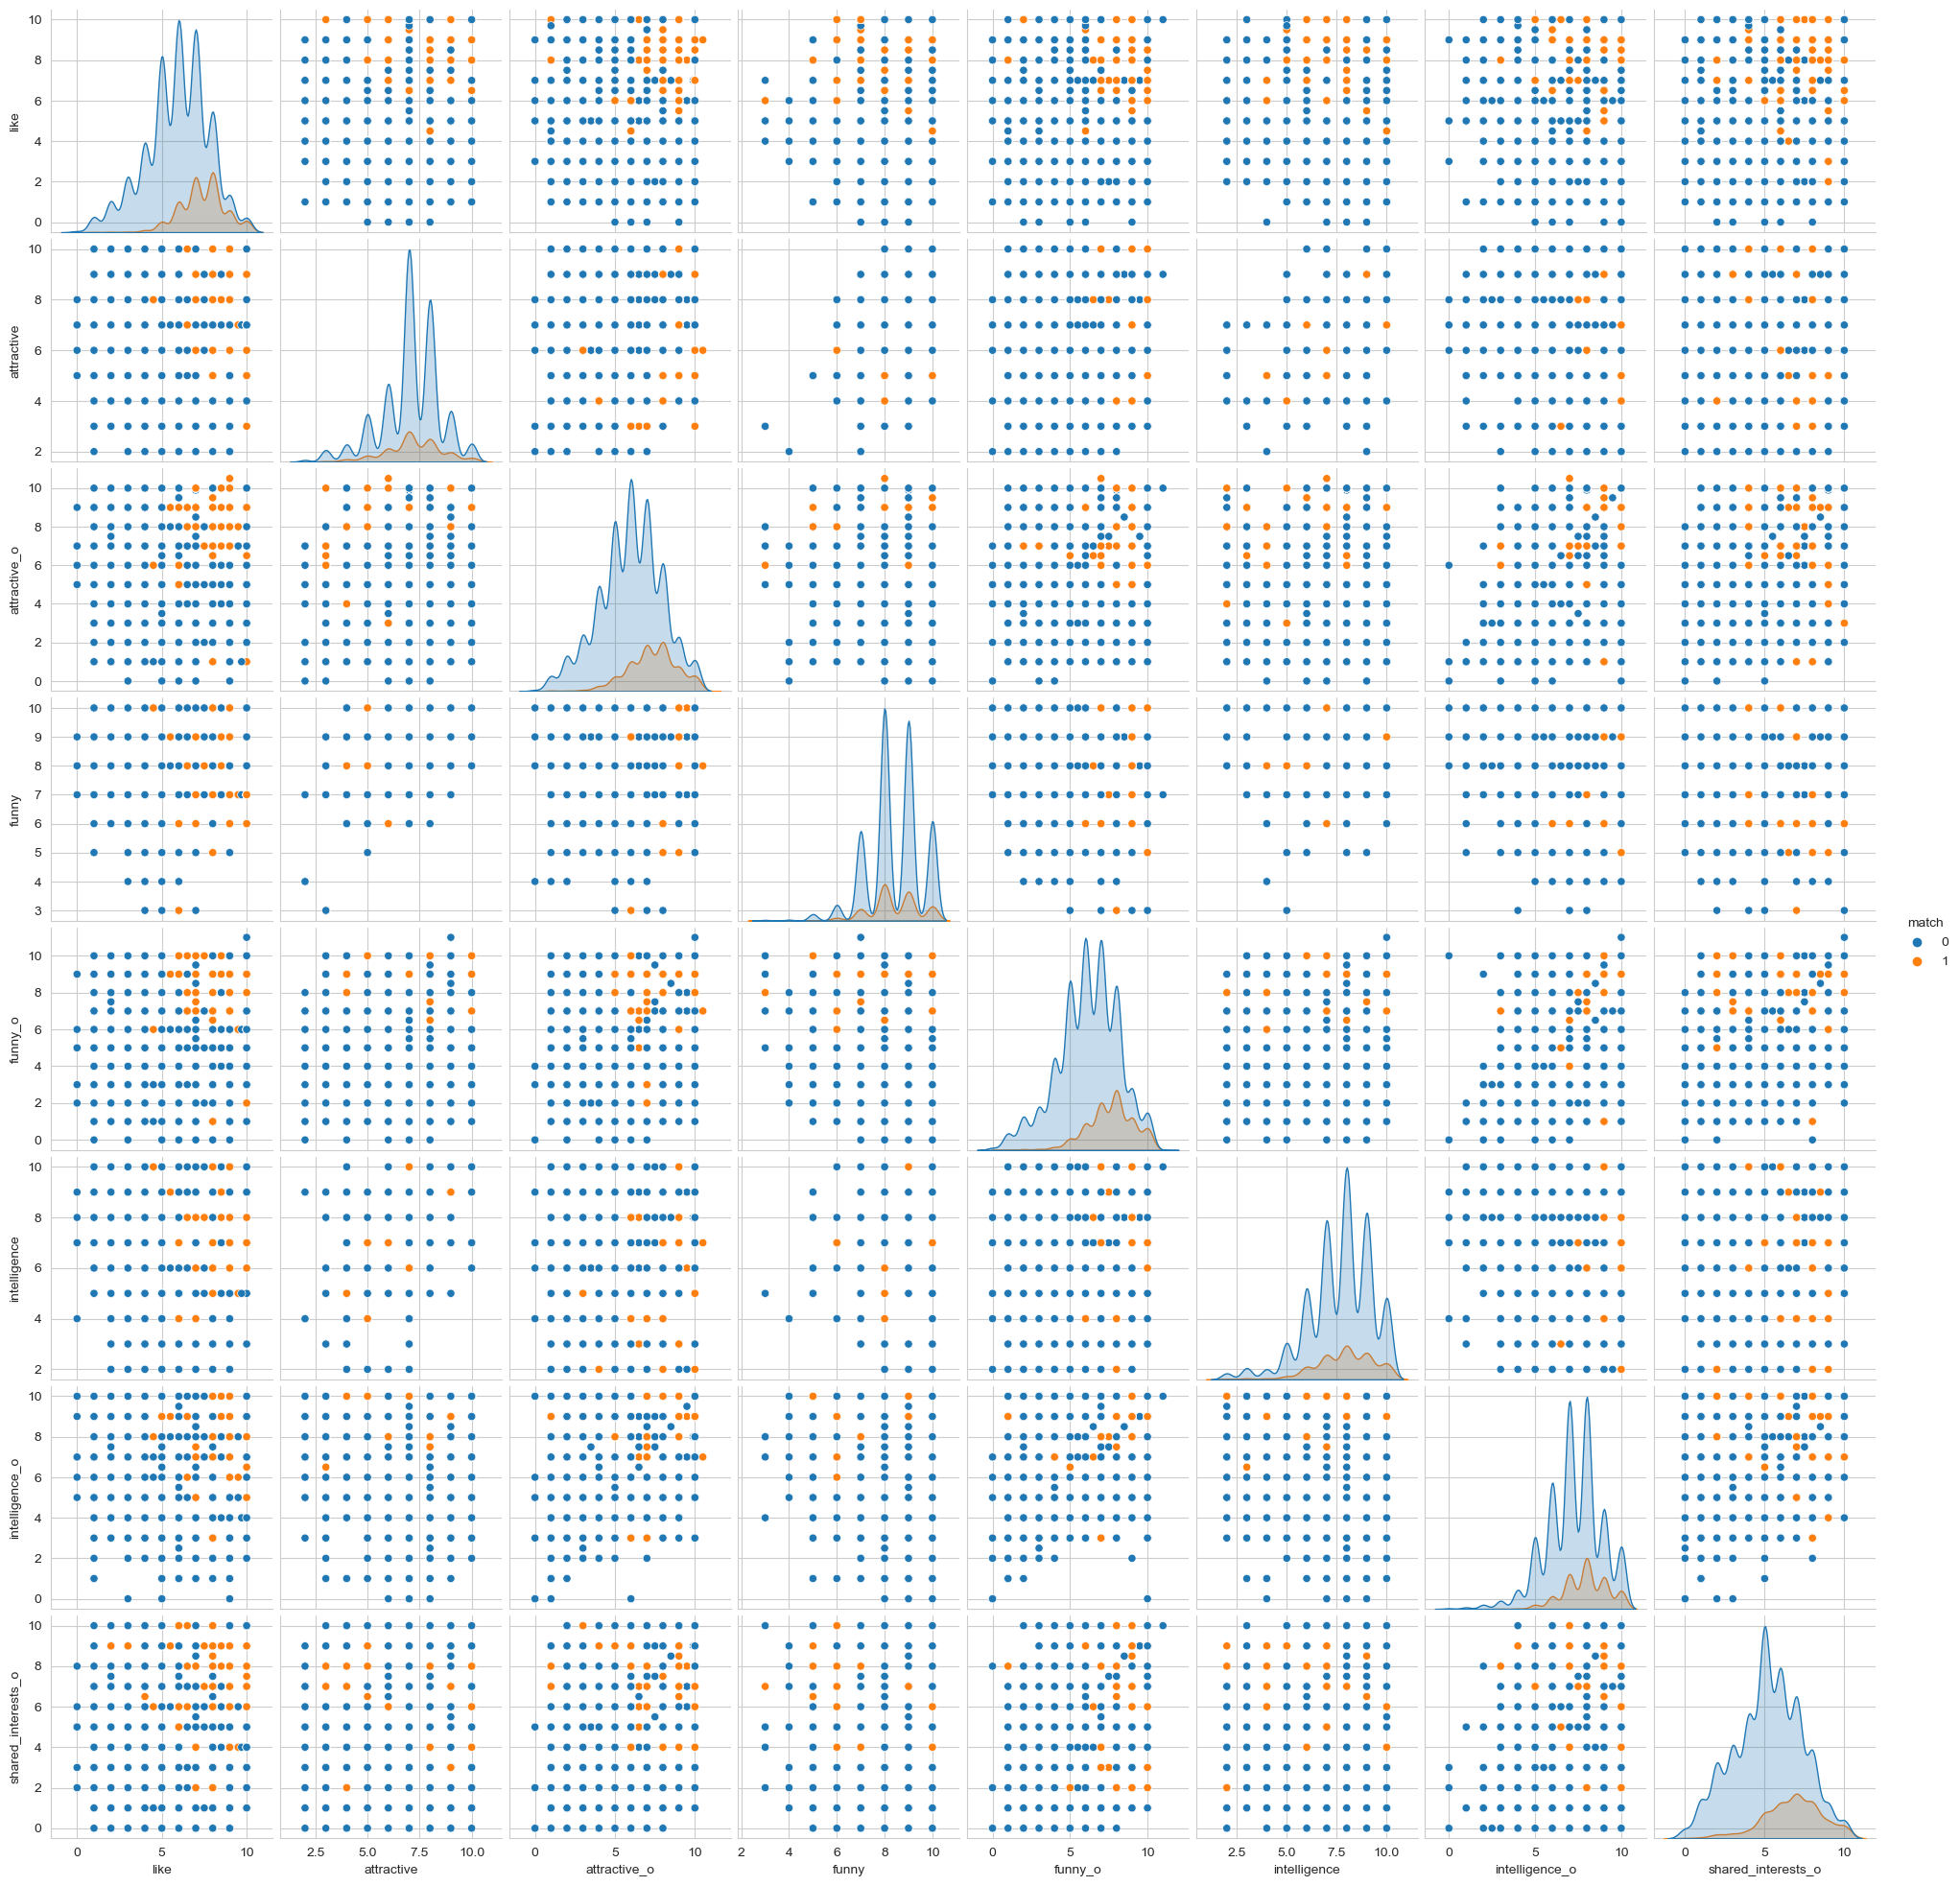

In [6]:
# 
#personality_DF = raw_df[['age', 'age_o', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'intelligence_o', 'ambitous_o', 'shared_interests_o', 'match']].copy()
#personality_DF = raw_df[['like', 'attractive', 'attractive_o', 'funny', 'funny_o', 'intelligence', 'intelligence_o', 'shared_interests_o', 'match']].copy()

sns.set_style('whitegrid');
sns.pairplot(personality_DF, hue='match');
plt.show()

## 1.2 Feature Engineering

### 1.2.1 Creating Unique PersonID

### 1.2.2 Capturing Trait Importance

In [120]:
# 
df = pd.read_csv('./data/raw/raw_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: float64(59), int64(60), object(4)
memory usage: 7.9+ MB


In [ ]:
def scale_rating(rating):
    return rating-5

## important to self --> rate your partner
## ---------------------------------------

# attractive_important --> attractive_partner
df['f_eng_attractive'] = df['attractive_partner'].apply(lambda x: scale_rating(x))
df['f_eng_attractive'] = df['f_eng_attractive'] * df['attractive_important']

# funny_important --> funny_partner
df['f_eng_funny'] = df['funny_partner'].apply(lambda x: scale_rating(x))
df['f_eng_funny'] = df['f_eng_funny'] * df['funny_important']

# intellicence_important --> intelligence_partner
df['f_eng_intelligence'] = df['intelligence_partner'].apply(lambda x: scale_rating(x))
df['f_eng_intelligence'] = df['f_eng_intelligence'] * df['intellicence_important']

# sincere_important --> sincere_partner
df['f_eng_sincere'] = df['sincere_partner'].apply(lambda x: scale_rating(x))
df['f_eng_sincere'] = df['f_eng_sincere'] * df['sincere_important']

# ambtition_important --> ambition_partner
df['f_eng_ambition'] = df['ambition_partner'].apply(lambda x: scale_rating(x))
df['f_eng_ambition'] = df['f_eng_ambition'] * df['ambtition_important']

# shared_interests_important --> shared_interests_partner
df['f_eng_shared_interests'] = df['shared_interests_partner'].apply(lambda x: scale_rating(x))
df['f_eng_shared_interests'] = df['f_eng_shared_interests'] * df['shared_interests_important']


## important to partner --> rate self
## ---------------------------------------

# pref_o_attractive --> attractive_o
df['f_eng_attractive_o'] = df['attractive_o'].apply(lambda x: scale_rating(x))
df['f_eng_attractive_o'] = df['f_eng_attractive_o'] * df['pref_o_attractive']

# pref_o_funny --> funny_o
df['f_eng_funny_o'] = df['funny_o'].apply(lambda x: scale_rating(x))
df['f_eng_funny_o'] = df['f_eng_funny_o'] * df['pref_o_funny']

# pref_o_intelligence --> intelligence_o
df['f_eng_intelligence_o'] = df['intelligence_o'].apply(lambda x: scale_rating(x))
df['f_eng_intelligence_o'] = df['f_eng_intelligence_o'] * df['pref_o_intelligence']

# pref_o_sincere --> sincere_o
df['f_eng_sincere_o'] = df['sinsere_o'].apply(lambda x: scale_rating(x))
df['f_eng_sincere_o'] = df['f_eng_sincere_o'] * df['pref_o_sincere']

# pref_o_ambitious --> ambitious_o
df['f_eng_ambitious_o'] = df['ambitous_o'].apply(lambda x: scale_rating(x))
df['f_eng_ambitious_o'] = df['f_eng_ambitious_o'] * df['pref_o_ambitious']

# pref_o_shared_interests --> shared_interests_o
df['f_eng_shared_interests_o'] = df['shared_interests_o'].apply(lambda x: scale_rating(x))
df['f_eng_shared_interests_o'] = df['f_eng_shared_interests_o'] * df['pref_o_shared_interests']

# full feature list
f_eng_importance_self = [
    # --*-- self --*--
    'f_eng_attractive', 
    'f_eng_funny', 
    'f_eng_intelligence', 
    'f_eng_sincere', 
    'f_eng_ambition', 
    'f_eng_shared_interests',
    'match'
]
f_eng_importance_partner = [
    # --*-- partner --*--
    'f_eng_attractive_o', 
    'f_eng_funny_o', 
    'f_eng_intelligence_o', 
    'f_eng_sincere_o', 
    'f_eng_ambitious_o', 
    'f_eng_shared_interests_o',
    'match'
]

In [ ]:
# sns pairplot of f_eng importance to self
f_eng_self = df[f_eng_importance_self]

sns.set_style('whitegrid');
sns.pairplot(f_eng_self, hue='match');
plt.show()

In [ ]:
# sns pairplot of f_eng importance to partner
f_eng_partner = df[f_eng_importance_partner]

sns.set_style('whitegrid');
sns.pairplot(f_eng_partner, hue='match');
plt.show()

## 1.3 Univariate Feature Exploration

## 1.4 Exploring Feature Relations

## 1.5 Summary of Key Findings

-->

---

# 2. Preprocessing

## 2.1 Checking Data Consistency <a class="anchor" id="investigating_outliers"></a>

<b>Creating an index for each person</b>

According to the dataset documentation, each observation is a date between two people. We think it might be interesting to add an identifier to each person to see how many dates that person has had. This identifier has been created by joining all the attributes that correspond to the person who has the date and leaving out the attributes of the partner.

In [5]:
#
df = pd.read_csv('./data/raw/raw_data.csv')

def index(df):
    return df['gender']+str(df['age'])+df['race']+df['field']+str(df['attractive_important'])+str(df['sincere_important'])+str(df['intellicence_important'])+str(df['funny_important'])+str(df['ambtition_important'])+str(df['attractive'])+str(df['sincere'])+str(df['intelligence'])+str(df['funny'])+str(df['ambition'])+str(df['sports'])+str(df['tvsports'])+str(df['exercise'])+str(df['dining'])+str(df['museums'])+str(df['art'])+str(df['hiking'])+str(df['gaming'])+str(df['clubbing'])+str(df['reading'])+str(df['tv'])+str(df['theater'])+str(df['movies'])+str(df['concerts'])+str(df['music'])+str(df['shopping'])+str(df['yoga'])


df['index_id'] = df.apply(lambda row : index(row), axis = 1)

dict_ids = {}

i=1
for id in df.index_id.unique():
        dict_ids[id] = i
        i=i+1

df['person_id'] = df['index_id'].map(dict_ids)
del df["index_id"]

<b>Reducing the variability of 'field' attribute</b>

In [6]:
## ---*--- Reducing variability of 'field' attribute ---*---
##

def fix_field(og_field):
    for key, value in field_dict.items():
        if og_field.lower() in value:
            return key

field_dict = {
    'law': ['law', 'law and social work', 'law and english literature [j.d./ph.d.]', 'intellectual property law', 'law/business'],
    'business': ['business', 'business [mba]', 'business- mba', 'international business', 'marketing', 'international relations', 'business; marketing', 'mba', 'public administration', 'master in public administration', 'masters in public administration', 'business/ finance/ real estate', 'business/law', 'business school', 'business administration', 'business consulting', 'business; media', 'fundraising management', 'business [finance & marketing]', 'mba - private equity / real estate', 'general management/finance'],
    'mathematics': ['mathematics', 'statistics', 'math', 'mathematics; phd', 'operations research', 'operations research [seas]', 'math education', 'ma in quantitative methods', 'stats', 'math of finance'],
    'finance': ['finance','finanace', 'mathematical finance', 'finance&economics', 'international finance; economic policy', 'financial math', 'international finance and business', 'finance/economics', 'mba finance', 'financial engineering'],
    'architecture': ['architecture', 'urban planning'],
    'engineering': ['electrical engineering', 'engineering', 'computer science', 'biomedical engineering', 'mechanical engineering', 'industrial engineering', 'electrical engg.', 'environmental engineering', 'industrial engineering/operations research', 'masters of industrial engineering'],
    'physics': ['marine geophysics', 'physics', 'physics [astrophysics]'],
    'biology': ['microbiology', 'biology', 'cell biology', 'ma biotechnology', 'neurobiology','neuroscience', 'conservation biology', 'biotechnology', 'genetics', 'molecular biology', 'genetics & development', 'biomedical informatics', 'neurosciences/stem cells', 'biology phd', 'biochemistry/genetics', 'biochemistry & molecular biophysics'],
    'chemistry': ['chemistry', 'biochemistry', 'computational biochemsistry'],
    'anthropology': ['museum anthropology', 'anthropology'], 
    'environmental science': ['climate-earth and environ. science', 'climate change', 'ecology', 'earth and environmental science', 'climate dynamics'],
    'political science': ['political science', 'business & international affairs', 'international affairs', 'international affairs/finance', 'international affairs - economic development', 'international affairs/international finance', 'international affairs and public health','business and international affairs [mba/mia dual degree]', 'international affairs/business', 'master of international affairs', 'international politics', 'mba / master of international affairs [sipa]', 'sipa / mia', 'international security policy - sipa', 'intrernational affairs', 'international affairs - economic policy', 'sipa - energy', 'public policy', 'human rights: middle east', 'human rights', 'sipa-international affairs', 'social work/sipa'],
    'sociology': ['social work', 'masters of social work', 'sociology', 'economics; sociology', 'qmss', 'international development', 'sociology and education', 'american studies', 'african-american studies/history'],
    'economics': ['applied maths/econs', 'economics', 'money', 'economics; english',  'economics and political science'],
    'psychology': ['psychology', 'psychology and english', 'clinical psychology', 'educational psychology', 'organizational psychology', 'school psychology', 'counseling psychology'],
    'medicine': ['medicine', 'medical informatics', 'biomedicine', 'epidemiology', 'gs postbacc premed', 'medicine and biochemistry'],
    'health': ['nutritiron', 'nutrition/genetics', 'sociomedical sciences- school of public health', 'tc [health ed]', 'health policy', 'nutrition', 'applied physiology & nutrition', 'public health'],
    'art': ['film', 'art history/medicine', 'art education', 'arts administration', 'art history', 'mfa -film', 'theatre management & producing', 'gsas', 'theater', 'mfa acting program', 'acting'],
    'education': ['elementary/childhood education [ma]', 'international educational development', 'education administration', 'masters of social work&education', 'speech language pathology', 'speech languahe pathology', 'elementary education', 'ma science education', 'social studies education', 'ma teaching social studies', 'education policy', 'education- literacy specialist', 'anthropology/education', 'bilingual education', 'education', 'tesol', 'cognitive studies in education', 'curriculum and teaching/giftedness', 'english education', 'early childhood education', 'ed.d. in higher education policy at tc', 'music education', 'communications in education', 'higher ed. - m.a.', 'neuroscience and education', 'elementary education - preservice', 'education leadership - public school administration', 'teaching of english'],
    'literature': ['german literature','classics', 'polish', 'english and comp lit','english', 'mfa creative writing', 'comparative literature', 'modern chinese literature', 'japanese literature', 'french', 'creative writing', 'creative writing - nonfiction', 'writing: literary nonfiction', 'creative writing [nonfiction]', 'nonfiction writing', 'mfa writing', 'mfa  poetry', 'soa -- writing'],
    'philosophy': ['philosophy [ph.d.]', 'philosophy and physics', 'philosophy'],
    'communications': ['speech pathology', 'instructional tech & media', 'instructional media and technology', 'journalism', 'communications'],
    'history': ['history', 'history [gsas - phd]', 'american studies [masters]'],
    'religion': ['religion', 'history of religion', 'religion; gsas'],
    'other/job': ['working', 'consulting', 'undergrad - gs', 'theory', '?']
}
            
df.field = df.field.apply(lambda x: fix_field(x))
df[df.field.isnull()].field # verify

Series([], Name: field, dtype: object)

In [7]:
df.head()

has_null  wave  gender   age  age_o  d_age  d_d_age  \
0         0   1.0  female  21.0   27.0    6.0        2   
1         0   1.0  female  21.0   22.0    1.0        0   
2         1   1.0  female  21.0   22.0    1.0        0   
3         0   1.0  female  21.0   23.0    2.0        1   
4         0   1.0  female  21.0   24.0    3.0        1   

                                    race  \
0  Asian/Pacific Islander/Asian-American   
1  Asian/Pacific Islander/Asian-American   
2  Asian/Pacific Islander/Asian-American   
3  Asian/Pacific Islander/Asian-American   
4  Asian/Pacific Islander/Asian-American   

                                  race_o  samerace  importance_same_race  \
0            European/Caucasian-American         0                   2.0   
1            European/Caucasian-American         0                   2.0   
2  Asian/Pacific Islander/Asian-American         1                   2.0   
3            European/Caucasian-American         0                   2.0   
4               Latino/Hispanic American         0                   2.0   

   importance_same_religion  d_importance_same_race  \
0                       4.0                       1   
1                       4.0                       1   
2                       4.0                       1   
3                       4.0                       1   
4                       4.0                       1   

   d_importance_same_religion field  pref_o_attractive  pref_o_sincere  \
0                           1   law               35.0            20.0   
1                           1   law               60.0             0.0   
2                           1   law               19.0            18.0   
3                           1   law               30.0             5.0   
4                           1   law               30.0            10.0   

   pref_o_intelligence  pref_o_funny  pref_o_ambitious  \
0                 20.0          20.0               0.0   
1                  0.0          40.0               0.0   
2                 19.0          18.0              14.0   
3                 15.0          40.0               5.0   
4                 20.0          10.0              10.0   

   pref_o_shared_interests  d_pref_o_attractive  d_pref_o_sincere  \
0                      5.0                    2                 1   
1                      0.0                    2                 0   
2                     12.0                    1                 1   
3                      5.0                    2                 0   
4                     20.0                    2                 0   

   d_pref_o_intelligence  d_pref_o_funny  d_pref_o_ambitious  \
0                      1               1                   0   
1                      0               2                   0   
2                      1               1                   0   
3                      0               2                   0   
4                      1               0                   0   

   d_pref_o_shared_interests  attractive_o  sinsere_o  intelligence_o  \
0                          0           6.0        8.0             8.0   
1                          0           7.0        8.0            10.0   
2                          0          10.0       10.0            10.0   
3                          0           7.0        8.0             9.0   
4                          1           8.0        7.0             9.0   

   funny_o  ambitous_o  shared_interests_o  d_attractive_o  d_sinsere_o  \
0      8.0         8.0                 6.0               1            1   
1      7.0         7.0                 5.0               1            1   
2     10.0        10.0                10.0               2            2   
3      8.0         9.0                 8.0               1            1   
4      6.0         9.0                 7.0               1            1   

   d_intelligence_o  d_funny_o  d_ambitous_o  d_shared_interests_o  \
0                 1          1             1   

<b> Feature Engineering: Capturing Feature Importance</b>

In [8]:
def scale_rating(rating):
    return rating-5

## important to self --> rate your partner
## ---------------------------------------

# attractive_important --> attractive_partner
df['f_eng_attractive'] = df['attractive_partner'].apply(lambda x: scale_rating(x))
df['f_eng_attractive'] = df['f_eng_attractive'] * df['attractive_important']

# funny_important --> funny_partner
df['f_eng_funny'] = df['funny_partner'].apply(lambda x: scale_rating(x))
df['f_eng_funny'] = df['f_eng_funny'] * df['funny_important']

# intellicence_important --> intelligence_partner
df['f_eng_intelligence'] = df['intelligence_partner'].apply(lambda x: scale_rating(x))
df['f_eng_intelligence'] = df['f_eng_intelligence'] * df['intellicence_important']

# sincere_important --> sincere_partner
df['f_eng_sincere'] = df['sincere_partner'].apply(lambda x: scale_rating(x))
df['f_eng_sincere'] = df['f_eng_sincere'] * df['sincere_important']

# ambtition_important --> ambition_partner
df['f_eng_ambition'] = df['ambition_partner'].apply(lambda x: scale_rating(x))
df['f_eng_ambition'] = df['f_eng_ambition'] * df['ambtition_important']

# shared_interests_important --> shared_interests_partner
df['f_eng_shared_interests'] = df['shared_interests_partner'].apply(lambda x: scale_rating(x))
df['f_eng_shared_interests'] = df['f_eng_shared_interests'] * df['shared_interests_important']


## important to partner --> rate self
## ---------------------------------------

# pref_o_attractive --> attractive_o
df['f_eng_attractive_o'] = df['attractive_o'].apply(lambda x: scale_rating(x))
df['f_eng_attractive_o'] = df['f_eng_attractive_o'] * df['pref_o_attractive']

# pref_o_funny --> funny_o
df['f_eng_funny_o'] = df['funny_o'].apply(lambda x: scale_rating(x))
df['f_eng_funny_o'] = df['f_eng_funny_o'] * df['pref_o_funny']

# pref_o_intelligence --> intelligence_o
df['f_eng_intelligence_o'] = df['intelligence_o'].apply(lambda x: scale_rating(x))
df['f_eng_intelligence_o'] = df['f_eng_intelligence_o'] * df['pref_o_intelligence']

# pref_o_sincere --> sincere_o
df['f_eng_sincere_o'] = df['sinsere_o'].apply(lambda x: scale_rating(x))
df['f_eng_sincere_o'] = df['f_eng_sincere_o'] * df['pref_o_sincere']

# pref_o_ambitious --> ambitious_o
df['f_eng_ambitious_o'] = df['ambitous_o'].apply(lambda x: scale_rating(x))
df['f_eng_ambitious_o'] = df['f_eng_ambitious_o'] * df['pref_o_ambitious']

# pref_o_shared_interests --> shared_interests_o
df['f_eng_shared_interests_o'] = df['shared_interests_o'].apply(lambda x: scale_rating(x))
df['f_eng_shared_interests_o'] = df['f_eng_shared_interests_o'] * df['pref_o_shared_interests']

## 2.2 Investigating Outliers <a class="anchor" id="investigating_outliers"></a>


<b>Outliers and wrong records as missing values</b>

For the variable `age` we can distinguish an extreme outlier that corresponds to a single person that is 55 years old. To treat this outlier we will declare her age as missing and then impute the value.

Moreover, we have observed that in variables `gaming`, `reading`, `attractive_o` and `funny_o` there are some observations above 10. We will consider these as incorrect because the values must be between 0 and 10. As we do not know if these people like too much these activities or there has been an error and for example instead of 13 the real value is 3, we will treat these values like missing and then impute them.

In [9]:
# 55 year old woman
df.loc[df['age'] == 55,['age']] = np.nan
df.loc[df['age_o'] == 55,['age_o']] = np.nan

# gaming and reading above 10
df.loc[df['gaming'] > 10,['gaming']] = np.nan
df.loc[df['reading'] > 10,['reading']] = np.nan

df.loc[df['attractive_o'] > 10,['attractive_o']] = np.nan
df.loc[df['funny_o'] > 10,['funny_o']] = np.nan

df.describe()

has_null         wave          age        age_o        d_age  \
count  8378.00000  8378.000000  8277.000000  8268.000000  8378.000000   
mean      0.87491    11.350919    26.338166    26.344219     4.185605   
std       0.33084     5.995903     3.483658     3.480411     4.596171   
min       0.00000     1.000000    18.000000    18.000000     0.000000   
25%       1.00000     7.000000    24.000000    24.000000     1.000000   
50%       1.00000    11.000000    26.000000    26.000000     3.000000   
75%       1.00000    15.000000    28.000000    28.000000     5.000000   
max       1.00000    21.000000    42.000000    42.000000    37.000000   

           d_d_age     samerace  importance_same_race  \
count  8378.000000  8378.000000           8299.000000   
mean      1.351755     0.395799              3.784793   
std       1.049246     0.489051              2.845708   
min       0.000000     0.000000              0.000000   
25%       0.000000     0.000000              1.000000   
50%       1.000000     0.000000              3.000000   
75%       2.000000     1.000000              6.000000   
max       3.000000     1.000000             10.000000   

       importance_same_religion  d_importance_same_race  \
count               8299.000000             8378.000000   
mean                   3.651645                0.940797   
std                    2.805237                0.791249   
min                    1.000000                0.000000   
25%                    1.000000                0.000000   
50%                    3.000000                1.000000   
75%                    6.000000                2.000000   
max                   10.000000                2.000000   

       d_importance_same_religion  pref_o_attractive  pref_o_sincere  \
count                 8378.000000        8289.000000     8289.000000   
mean                     0.897708          22.495347       17.396867   
std                      0.793712          12.569802        7.044003   
min                      0.000000           0.000000        0.000000   
25%                      0.000000          15.000000       15.000000   
50%                      1.000000          20.000000       18.370000   
75%                      2.000000          25.000000       20.000000   
max                      2.000000         100.000000       60.000000   

       pref_o_intelligence  pref_o_funny  pref_o_ambitious  \
count          8289.000000   8280.000000       8271.000000   
mean             20.270759     17.459714         10.685375   
std               6.782895      6.085526          6.126544   
min               0.000000      0.000000          0.000000   
25%              17.390000     15.000000          5.000000   
50%              20.000000     18.000000         10.000000   
75%              23.810000     20.000000         15.000000   
max              50.000000     50.000000         53.000000   

       pref_o_shared_interests  d_pref_o_attractive  d_pref_o_sincere  \
count              8249.000000          8378.000000       8378.000000   
mean                 11.845930             1.061590          0.812366   
std                   6.362746             0.808235          0.713371   
min                   0.000000             0.000000          0.000000   
25%                   9.520000             0.000000          0.000000   
50%                  10.640000             1.000000          1.000000   
75%                  16.000000             2.000000          1.000000   
max                  30.000000             2.000000          2.000000   

       d_pref_o_intelligence  d_pref_o_funny  d_pref_o_ambitious  \
count            8378.000000     8378.000000         8378.000000   
mean                1.110766        0.777035            0.214013   
std                 0.691289        0.698871            0.436935   
min                 0.000000        0.000000            0.000000   
25%                 1.000000        0.000000            0.000000   
50%                 1.000000   

## 2.3 Investigating Missing Values <a class="anchor" id="investigating_missing_values"></a>

### 2.3.1 Missingness Summary

#### Key Findings:
- 1.78% missing values globally
- only 4 attributes have over 10% missing observations
    - expected_num_interested_in_me     
    - expected_num_matches 
    - shared_interests_o     
    - shared_interests_partner
- an extra 15 attributes have over 1% missing observations

In [10]:
## ---*--- Global ---*---
## 

global_missing = round( 100 * (df.isnull().sum().sum() / (8378 * 123)), 2) # total NA / size of df
print('{}% missing values globally'.format(global_missing))

if global_missing < 2:
    print('nice...\n')

## ---*--- By Attribute ---*---
## 

# filling dict as {'column_name': [total NA, percentage NA]}
missing_dict = {col: [df[col].isnull().sum(), round(df[col].isnull().sum() / len(df[col]), 4) * 100] for col in df}
# fancy method to sort dictionary descending by value
missing_dict = dict(sorted(missing_dict.items(), key=lambda x:x[1], reverse=True))

# output 'pretty format' partial results
print('{:<32} {:<10} {:<10}'.format('attribute', 'total NA', '% NA'))
print('{:<32} {:<10} {:<10}'.format('-'*31, '-'*9, '-'*6))
for key, value in missing_dict.items():
    if value[0] != 0:
        print('{:<32} {:<10} {} %'.format(key, value[0], round(value[1], 1)))

2.44% missing values globally
attribute                        total NA   % NA      
-------------------------------  ---------  ------    
expected_num_interested_in_me    6578       78.5 %
f_eng_shared_interests_o         1185       14.1 %
f_eng_shared_interests           1177       14.0 %
expected_num_matches             1173       14.0 %
shared_interests_o               1076       12.8 %
shared_interests_partner         1067       12.7 %
f_eng_ambitious_o                809        9.7 %
f_eng_ambition                   801        9.6 %
ambitous_o                       722        8.6 %
ambition_partner                 712        8.5 %
f_eng_funny_o                    440        5.2 %
f_eng_funny                      431        5.1 %
f_eng_intelligence_o             377        4.5 %
met                              375        4.5 %
f_eng_intelligence               367        4.4 %
funny_o                          361        4.3 %
f_eng_sincere_o                  358        4.3 %
funn

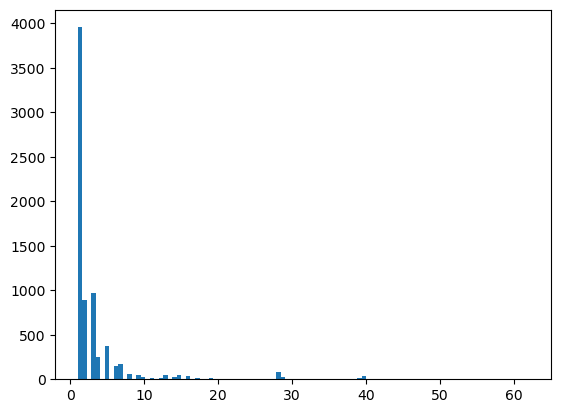

In [11]:
# ---*--- By Observation ---*---

# sum of global missing values 
df['has_null'].sum()
# new attribute with count of missing values in each row
df['nulls_byRow'] = df.isnull().sum(axis=1)

# plot histogram of df['null_byRow']
plt.hist(df.nulls_byRow[df['nulls_byRow'] != 0], bins = 100);
#df['nulls_byRow'].value_counts()

### 2.3.2 Missingness Mechanisms

### 2.3.3 Missing Value Treatment

<b>Dropping fields and observations with majority missings</b>

In [12]:
# dropping 'expected_num_interested_in_me' attribute with ~80% missing values
df.drop('expected_num_interested_in_me', axis=1, inplace=True)
# dropping all observations with 10 or more missing values (approx. )
df = df[df['nulls_byRow'] < 10]

<b>OneHot Encoding of Categorical Variables</b>

In [13]:
# initializing OneHotEncoder
ohe = OneHotEncoder()

transformer = make_column_transformer(
    (OneHotEncoder(), ['gender', 'race', 'race_o', 'field']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7919 entries, 0 to 7918
Columns: 169 entries, onehotencoder__x0_female to nulls_byRow
dtypes: float64(169)
memory usage: 10.2 MB


<b>Multiple Imputation by Chained Equations (MICE)</b>

In [14]:
# initializing iterative imputer
imp = IterativeImputer(
    estimator=linear_model.BayesianRidge(),
    #estimator=XGBRegressor(
        #n_estimators=7,
        #random_state=42,
        #tree_method='auto'
    #),
    missing_values=np.nan,
    max_iter=10,
    initial_strategy='mean',
    imputation_order='ascending',
    n_nearest_features=None,
    verbose=2,
    random_state=42
)

oneHot_df = pd.DataFrame(imp.fit_transform(transformed_df), columns=transformed_df.columns)
oneHot_df.shape

[IterativeImputer] Completing matrix with shape (7919, 169)
[IterativeImputer] Ending imputation round 1/10, elapsed time 24.63
[IterativeImputer] Change: 288.04598260566917, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 2/10, elapsed time 48.41
[IterativeImputer] Change: 53.86619308273767, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 3/10, elapsed time 73.82
[IterativeImputer] Change: 34.32933170168673, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 4/10, elapsed time 98.39
[IterativeImputer] Change: 22.38799516524027, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 5/10, elapsed time 127.28
[IterativeImputer] Change: 14.828059557825025, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 6/10, elapsed time 154.12
[IterativeImputer] Change: 9.923223297665015, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 7/10, elapsed time 177.72
[IterativeImputer] Change: 6.8253

(7919, 169)

In [15]:
id_variables =['age','attractive_important','sincere_important','intellicence_important',
'funny_important','ambtition_important','attractive','sincere','intelligence','funny','ambition','sports','tvsports',
'exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music',
'shopping','yoga']

oneHot_processed_df = pd.DataFrame()

# assign to each 'person_id' the mean of imputed values for same category in different observations
for id in oneHot_df.person_id.unique():
    df_id = oneHot_df[oneHot_df['person_id']==id]
    for variable in id_variables:
        df_id[variable] = round(df_id[variable].mean(),0);
    oneHot_processed_df = pd.concat([oneHot_processed_df, df_id])

oneHot_processed_df = oneHot_processed_df.round(2)
oneHot_processed_df.describe()

onehotencoder__x0_female  onehotencoder__x0_male  \
count               7919.000000             7919.000000   
mean                   0.499811                0.500189   
std                    0.500032                0.500032   
min                    0.000000                0.000000   
25%                    0.000000                0.000000   
50%                    0.000000                1.000000   
75%                    1.000000                1.000000   
max                    1.000000                1.000000   

       onehotencoder__x1_Asian/Pacific Islander/Asian-American  \
count                                        7919.000000         
mean                                            0.239929         
std                                             0.427067         
min                                             0.000000         
25%                                             0.000000         
50%                                             0.000000         
75%                                             0.000000         
max                                             1.000000         

       onehotencoder__x1_Black/African American  \
count                               7919.000000   
mean                                   0.047986   
std                                    0.213750   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       onehotencoder__x1_European/Caucasian-American  \
count                                    7919.000000   
mean                                        0.567622   
std                                         0.495437   
min                                         0.000000   
25%                                         0.000000   
50%                                         1.000000   
75%                                         1.000000   
max                                         1.000000   

       onehotencoder__x1_Latino/Hispanic American  onehotencoder__x1_Other  \
count                                 7919.000000              7919.000000   
mean                                     0.080566                 0.063897   
std                                      0.272184                 0.244585   
min                                      0.000000                 0.000000   
25%                                      0.000000                 0.000000   
50%                                      0.000000                 0.000000   
75%                                      0.000000                 0.000000   
max                                      1.000000                 1.000000   

       onehotencoder__x2_Asian/Pacific Islander/Asian-American  \
count                                        7919.000000         
mean                                            0.240056         
std                                             0.427144         
min                                             0.000000         
25%                                             0.000000         
50%                                             0.000000         
75%                                             0.000000         
max                                             1.000000         

       onehotencoder__x2_Black/African American  \
count                               7919.000000   
mean                                   0.048491   
std                                    0.214815   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       onehotencoder__x2_European/Caucasian-American  \
count                                    7919.000000   
mean                                        0

<b>Recovering pre-oneHot DataFrame<b/>

In [16]:
# 

ohe.fit(df[['gender', 'race', 'race_o', 'field']])
encoded_cols = []
i = 0
for col in ohe.categories_:
    for cat in col:
        encoded_cols.append(f'onehotencoder__x{i}_{cat}')
    i += 1

# 
recovered_df = pd.DataFrame(ohe.inverse_transform(oneHot_processed_df[encoded_cols]), columns=['gender', 'race', 'race_o', 'field'])

processed_df = oneHot_processed_df.drop(columns=encoded_cols, axis=1)
recovered_df = pd.concat([recovered_df, processed_df], axis=1)

# export to ../data/processed
recovered_df.to_csv('./data/processed/processed_data.csv', index=False)

In [17]:
# better column names after onehotencoding
new_cols = []
for col in oneHot_processed_df.columns:
    if col[15:17] == 'x0':
        new_cols.append(f'gender_{col[18:]}')
    elif col[15:17] == 'x1':
        new_cols.append(f'race_{col[18:]}')
    elif col[15:17] == 'x2':
        new_cols.append(f'race_o_{col[18:]}')
    elif col[15:17] == 'x3':
        new_cols.append(f'field_{col[18:]}')
    else:
        new_cols.append(col)

oneHot_processed_df.columns = new_cols

# export to ../data/processed
oneHot_processed_df.to_csv('./data/processed/processed_oneHot.csv', index=False)

## 2.4 Feature Normalization

### 2.4.1 Feature Scaling

Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval, standardization can be more practical for many machine learning algorithms. The reason is that many linear models, such as the logistic regression and SVM, initialize the weights to 0 or small random values close to 0. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

In [19]:
from sklearn.preprocessing import StandardScaler

# load processed datasets for feature scaling
oneHot_processed_df = pd.read_csv('./data/processed/processed_oneHot.csv') # oneHot df
recovered_df = pd.read_csv('./data/processed/processed_data.csv') # original processed df

# instantiate StandardScaler object from sklearn
scaler = StandardScaler()

# get features list to fit scaler
NUMERICAL = [col for col in recovered_df.columns if recovered_df[col].dtype == 'float' and col not in ['match', 'like', 'met', 'guess_prob_liked', 'decision', 'decision_o', 'person_id', 'nulls_byRow']]

#
recovered_df_std = recovered_df.copy()
recovered_df_std[NUMERICAL] = scaler.fit_transform(recovered_df_std[NUMERICAL].values) 

#
oneHot_processed_df_std = oneHot_processed_df.copy()
oneHot_processed_df_std[NUMERICAL] = scaler.fit_transform(oneHot_processed_df_std[NUMERICAL].values)

# results summary
recovered_df_std[NUMERICAL].describe().loc[['mean', 'std', 'min', 'max']]

has_null          wave           age         age_o         d_age  \
mean  5.742485e-17 -5.742485e-17  2.871242e-17 -6.460295e-17  7.537011e-17   
std   1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min  -2.560527e+00 -1.727474e+00 -2.388814e+00 -2.392168e+00 -1.099194e+00   
max   3.905446e-01  1.621290e+00  4.476787e+00  4.489284e+00  8.163705e+00   

           d_d_age      samerace  importance_same_race  \
mean -7.895916e-17 -7.806190e-17          6.460295e-17   
std   1.000063e+00  1.000063e+00          1.000063e+00   
min  -1.275676e+00 -8.232583e-01         -1.330665e+00   
max   1.616968e+00  1.214686e+00          2.192770e+00   

      importance_same_religion  d_importance_same_race  \
mean             -5.383579e-17           -5.742485e-17   
std               1.000063e+00            1.000063e+00   
min              -9.470287e-01           -1.201438e+00   
max               2.249698e+00            1.332638e+00   

      d_importance_same_religion  pref_o_attractive  pref_o_sincere  \
mean               -3.589053e-17       2.153432e-17   -2.332884e-17   
std                 1.000063e+00       1.000063e+00    1.000063e+00   
min                -1.147225e+00      -1.786897e+00   -2.481418e+00   
max                 1.373201e+00       6.190748e+00    6.056898e+00   

      pref_o_intelligence  pref_o_funny  pref_o_ambitious  \
mean        -4.674741e-16  1.740691e-16     -5.742485e-17   
std          1.000063e+00  1.000063e+00      1.000063e+00   
min         -2.990943e+00 -2.859476e+00     -2.616823e+00   
max          4.372719e+00  5.341498e+00      6.910890e+00   

      pref_o_shared_interests  d_pref_o_attractive  d_pref_o_sincere  \
mean            -7.178106e-18         4.306863e-17      1.722745e-16   
std              1.000063e+00         1.000063e+00      1.000063e+00   
min             -2.232694e+00        -1.326643e+00     -1.159899e+00   
max              2.845142e+00         1.161382e+00      1.649903e+00   

      d_pref_o_intelligence  d_pref_o_funny  d_pref_o_ambitious  \
mean           4.306863e-17    8.613727e-17        8.613727e-17   
std            1.000063e+00    1.000063e+00        1.000063e+00   
min           -1.646586e+00   -1.123025e+00       -4.996744e-01   
max            1.274734e+00    1.738377e+00        4.043290e+00   

      d_pref_o_shared_interests  attractive_o     sinsere_o  intelligence_o  \
mean              -2.153432e-17  8.254822e-17  4.181247e-16    1.938089e-16   
std                1.000063e+00  1.000063e+00  1.000063e+00    1.000063e+00   
min               -5.838382e-01 -3.176883e+00 -4.108303e+00   -4.736933e+00   
max                3.089912e+00  1.991348e+00  1.628807e+00    1.705898e+00   

           funny_o    ambitous_o  shared_interests_o  d_attractive_o  \
mean -9.959622e-17  5.383579e-18        1.363840e-16    3.947958e-17   
std   1.000063e+00  1.000063e+00        1.000063e+00    1.000063e+00   
min  -3.267378e+00 -3.692442e+00       -2.555434e+00   -1.230265e+00   
max   2.278571e+00  1.852565e+00        2.240703e+00    1.971860e+00   

       d_sinsere_o  d_intelligence_o     d_funny_o  d_ambitous_o  \
mean -1.884253e-16      2.871242e-17  5.921937e-17  1.076716e-17   
std   1.000063e+00      1.000063e+00  1.000063e+00  1.000063e+00   
min  -1.740983e+00     -1.912571e+00 -1.295707e+00 -1.354901e+00   
max   1.585958e+00      1.571190e+00  1.894810e+00  1.738500e+00   

      d_shared_interests_o  attractive_important  sincere_important  \
mean          6.280842e-17         -8.613727e-17       2.153432e-17   
std           1.000063e+00          1.000063e+00       1.000063e+00   
min          -8.413123e-01         -1.788529e+00      -2.481691e+00   
max           2.427752e+00          6.191908e+00       6.059598e+00   

      intellicence_important  funny_important  ambtition_important  \
mean            2.081651e-16    -1.417676e-16        -5.742485e-17   
std             1.000063e+00     1.000063e+00         1.000063e+00   
min           

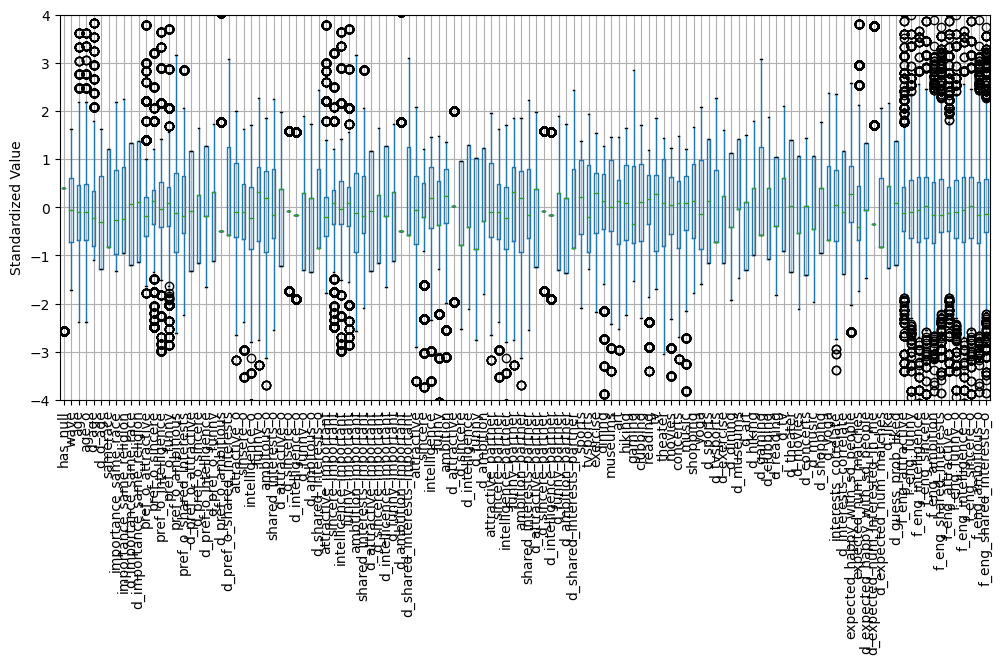

In [20]:
axes = recovered_df_std.boxplot(column=NUMERICAL, 
                                rot=90, figsize=(12,5), return_type='axes')
g = axes.set_ylim(-4.0, 4.0)
g = axes.set_ylabel('Standardized Value')

In [21]:
# export standardized data to ../data/processed
oneHot_processed_df_std.to_csv('./data/processed/scaled_oneHot.csv', index=False)
recovered_df_std.to_csv('./data/processed/scaled_data.csv', index=False)

---

# 3. Feature Selection

Below we explore several methods of feature selection, namely:
- Removing features with very low variance
    - `sklearn.feature_selection.VarianceThreshold`
- Removing features which have a high correlations with each other
    - Pearson correlation
- Univariate feature selection
    - ANOVA F-test & chi-squared
- Fitting models
    - Select features with best coefficients or importance
        - `sklearn.feature_selection.SelectFromModel`
    - Greedy feature selection
        - RFE
            - `sklearn.feature_selection.RFE`
    

In [67]:
# load processed data and display DF summary
#df = pd.read_csv('./data/processed/scaled_oneHot.csv') # oneHot data
df = pd.read_csv('./data/processed/f_eng_preimpute_scaled_oneHot.csv') 

NUMERICAL = [col for col in df.columns if df[col].dtype == 'float']
CATEGORICAL = [col for col in df.columns if df[col].dtype == 'object']

# full feature set list
full_training_feature_list = [col_name for col_name in df.columns if col_name not in ['has_null', 'wave', 'nulls_byRow', 'person_id', 'decision', 'decision_o', 'match']]

# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X = df[full_training_feature_list]
y = df['match']

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y, 
    test_size=0.25,
    random_state=42
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7919 entries, 0 to 7918
Columns: 169 entries, gender_female to nulls_byRow
dtypes: float64(169)
memory usage: 10.2 MB


In [68]:
df.head()

gender_female  gender_male  race_Asian/Pacific Islander/Asian-American  \
0            1.0          0.0                                         1.0   
1            1.0          0.0                                         1.0   
2            1.0          0.0                                         1.0   
3            1.0          0.0                                         1.0   
4            1.0          0.0                                         1.0   

   race_Black/African American  race_European/Caucasian-American  \
0                          0.0                               0.0   
1                          0.0                               0.0   
2                          0.0                               0.0   
3                          0.0                               0.0   
4                          0.0                               0.0   

   race_Latino/Hispanic American  race_Other  \
0                            0.0         0.0   
1                            0.0         0.0   
2                            0.0         0.0   
3                            0.0         0.0   
4                            0.0         0.0   

   race_o_Asian/Pacific Islander/Asian-American  \
0                                           0.0   
1                                           0.0   
2                                           1.0   
3                                           0.0   
4                                           0.0   

   race_o_Black/African American  race_o_European/Caucasian-American  \
0                            0.0                                 1.0   
1                            0.0                                 1.0   
2                            0.0                                 0.0   
3                            0.0                                 1.0   
4                            0.0                                 0.0   

   race_o_Latino/Hispanic American  race_o_Other  field_anthropology  \
0                              0.0           0.0                 0.0   
1                              0.0           0.0                 0.0   
2                              0.0           0.0                 0.0   
3                              0.0           0.0                 0.0   
4                              1.0           0.0                 0.0   

   field_architecture  field_art  field_biology  field_business  \
0                 0.0        0.0            0.0             0.0   
1                 0.0        0.0            0.0             0.0   
2                 0.0        0.0            0.0             0.0   
3                 0.0        0.0            0.0             0.0   
4                 0.0        0.0            0.0             0.0   

   field_chemistry  field_communications  field_economics  field_education  \
0              0.0                   0.0              0.0              0.0   
1              0.0                   0.0              0.0              0.0   
2              0.0                   0.0              0.0              0.0   
3              0.0                   0.0              0.0              0.0   
4              0.0                   0.0              0.0              0.0   

   field_engineering  field_environmental science  field_finance  \
0                0.0                          0.0            0.0   
1                0.0                          0.0            0.0   
2                0.0                          0.0            0.0   
3                0.0                          0.0            0.0   
4                0.0                          0.0            0.0   

   field_health  field_history  field_law  field_literature  \
0           0.0            0.0        1.0               0.0   
1           0.0            0.0        1.0               0.0   
2           0.0            0.0        1.0               0.0   
3           0.0            0.0        1.0               0.0   
4           0.0            0.0        1.0               0.0   

   field_

## 3.1 Analysis of Feature Variance

The simplest forms of feature selection would be to:
- remove features with very low variance
    - If a feature has a low variance (very close to 0) they are close to being constant and thus, do not add much value to a predictive model.
- remove features which have a high correlation between them
    - this is known as multicollinearity and has a detrimental effect on linear model predictive perfomance

In [69]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(dataframe, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(dataframe)
    return dataframe[dataframe.columns[selector.get_support(indices=True)]]

min_variance_df = variance_threshold_selector(df, 0.1)

In [70]:
min_variance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7919 entries, 0 to 7918
Columns: 138 entries, gender_female to nulls_byRow
dtypes: float64(138)
memory usage: 8.3 MB


<b> What features were removed? </b>

In [71]:
all_features = [col for col in df.columns]
min_variance_features = [col for col in min_variance_df.columns]

removed_features = []
for feature in all_features:
    if feature not in min_variance_features:
        removed_features.append(feature)

removed_features

['race_Black/African American',
 'race_Latino/Hispanic American',
 'race_Other',
 'race_o_Black/African American',
 'race_o_Latino/Hispanic American',
 'race_o_Other',
 'field_anthropology',
 'field_architecture',
 'field_art',
 'field_biology',
 'field_chemistry',
 'field_communications',
 'field_economics',
 'field_education',
 'field_engineering',
 'field_environmental science',
 'field_finance',
 'field_health',
 'field_history',
 'field_law',
 'field_literature',
 'field_mathematics',
 'field_medicine',
 'field_other/job',
 'field_philosophy',
 'field_physics',
 'field_political science',
 'field_psychology',
 'field_religion',
 'field_sociology',
 'met']

<b> Identifying and Removing Highly Correlated Features to adress multicollinearity </b>

In [60]:
# full feature set list
full_training_feature_list = [col_name for col_name in df.columns if (col_name in min_variance_features) and (col_name not in ['has_null', 'wave', 'nulls_byRow', 'person_id', 'decision', 'decision_o', 'match'])]

# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X = df[full_training_feature_list]
y = df['match']

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y, 
    test_size=0.25,
    random_state=42
)

X_train.corr()

gender_female  gender_male  \
gender_female                                      1.000000    -1.000000   
gender_male                                       -1.000000     1.000000   
race_Asian/Pacific Islander/Asian-American         0.039507    -0.039507   
race_European/Caucasian-American                  -0.075566     0.075566   
race_o_Asian/Pacific Islander/Asian-American      -0.032819     0.032819   
...                                                     ...          ...   
f_eng_funny_o                                      0.060802    -0.060802   
f_eng_intelligence_o                              -0.092732     0.092732   
f_eng_sincere_o                                   -0.022102     0.022102   
f_eng_ambitious_o                                 -0.232337     0.232337   
f_eng_shared_interests_o                           0.015650    -0.015650   

                                              race_Asian/Pacific Islander/Asian-American  \
gender_female                                                                   0.039507   
gender_male                                                                    -0.039507   
race_Asian/Pacific Islander/Asian-American                                      1.000000   
race_European/Caucasian-American                                               -0.641917   
race_o_Asian/Pacific Islander/Asian-American                                   -0.012890   
...                                                                                  ...   
f_eng_funny_o                                                                  -0.106635   
f_eng_intelligence_o                                                           -0.000633   
f_eng_sincere_o                                                                -0.008539   
f_eng_ambitious_o                                                              -0.004639   
f_eng_shared_interests_o                                                       -0.075551   

                                              race_European/Caucasian-American  \
gender_female                                                        -0.075566   
gender_male                                                           0.075566   
race_Asian/Pacific Islander/Asian-American                           -0.641917   
race_European/Caucasian-American                                      1.000000   
race_o_Asian/Pacific Islander/Asian-American                         -0.009807   
...                                                                        ...   
f_eng_funny_o                                                         0.030486   
f_eng_intelligence_o                                                  0.001922   
f_eng_sincere_o                                                      -0.036634   
f_eng_ambitious_o                                                    -0.011003   
f_eng_shared_interests_o                                              0.048169   

                                              race_o_Asian/Pacific Islander/Asian-American  \
gender_female                                                                    -0.032819   
gender_male                                                                       0.032819   
race_Asian/Pacific Islander/Asian-American                                       -0.012890   
race_European/Caucasian-American                                                 -0.009807   
race_o_Asian/Pacific Islander/Asian-American                                      1.000000   
...                                                                                    ...   
f_eng_funny_o                                                                    -0.027606   
f_eng_intelligence_o                                                             -0.106925   
f_eng_sincere_o                                                                   0.018345   
f_eng_ambitious_o                                                                -0.040186   
f_eng_sha

In [64]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.7)
len(set(corr_features))

33

In [65]:
corr_features

{'art',
 'd_ambition_partner',
 'd_art',
 'd_attractive_partner',
 'd_clubbing',
 'd_concerts',
 'd_d_age',
 'd_dining',
 'd_exercise',
 'd_expected_happy_with_sd_people',
 'd_expected_num_matches',
 'd_funny_partner',
 'd_gaming',
 'd_guess_prob_liked',
 'd_hiking',
 'd_importance_same_race',
 'd_importance_same_religion',
 'd_intelligence_partner',
 'd_interests_correlate',
 'd_like',
 'd_movies',
 'd_museums',
 'd_music',
 'd_reading',
 'd_shared_interests_partner',
 'd_shopping',
 'd_sincere_partner',
 'd_sports',
 'd_theater',
 'd_tv',
 'd_tvsports',
 'd_yoga',
 'gender_male'}

## 3.2 Initial Performance on Full Feature Set

In [72]:
from src.modelling.ensemble_cv import train_classifier_ensemble_CV, get_clf_name
from src.modelling.ensemble_cv import plot_mean_feature_importances, plot_top_feature_importances


# full feature set list
full_training_feature_list = [col_name for col_name in df.columns if (col_name in min_variance_features) and (col_name not in ['has_null', 'wave', 'nulls_byRow', 'person_id', 'decision', 'decision_o', 'match'])]

# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X = df[full_training_feature_list]
y = df['match']

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y, 
    test_size=0.25,
    random_state=42
)

num_jobs = -1

classifier_list = [LogisticRegression(n_jobs=num_jobs), 
                   SGDClassifier(alpha=0.01, n_jobs=num_jobs), 
                   DecisionTreeClassifier(), 
                   #ExtraTreeClassifier(max_depth=5, min_samples_split=10, splitter='random'), # is rubbish
                   RandomForestClassifier(n_estimators=100, n_jobs=num_jobs), 
                   SVC(shrinking=True, kernel='rbf'), 
                   XGBClassifier(booster='gbtree', n_jobs=num_jobs), 
                   GradientBoostingClassifier(n_estimators=100, loss='deviance'), 
                   AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50)]

clf_comp_Full_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(
    classifiers=classifier_list, 
    X_data=X_train, 
    y_data=y_train
)

# display the comparison results
clf_comp_Full_FeatureSet

/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.863763   
1               SGDClassifier             0.861312   
2      DecisionTreeClassifier             1.000000   
3      RandomForestClassifier             1.000000   
4                         SVC             0.891153   
5               XGBClassifier             1.000000   
6  GradientBoostingClassifier             0.896223   
7          AdaBoostClassifier             1.000000   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.002663            0.852671   
1                           0.002603            0.852165   
2                           0.000000            0.782961   
3                           0.000000            0.857214   
4                           0.002039            0.857046   
5                           0.000000            0.862265   
6                           0.001594            0.861088   
7                           0.000000            0.779425   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.017643            0.456595   
1                          0.011761            0.405631   
2                          0.011896            0.384827   
3                          0.011556            0.374365   
4                          0.008745            0.389195   
5                          0.013623            0.509810   
6                          0.016310            0.465308   
7                          0.008945            0.375392   

   F1-Score Standard Deviation  
0                     0.063223  
1                     0.055062  
2                     0.029230  
3                     0.068365  
4                     0.050016  
5                     0.049798  
6                     0.068214  
7                     0.037314

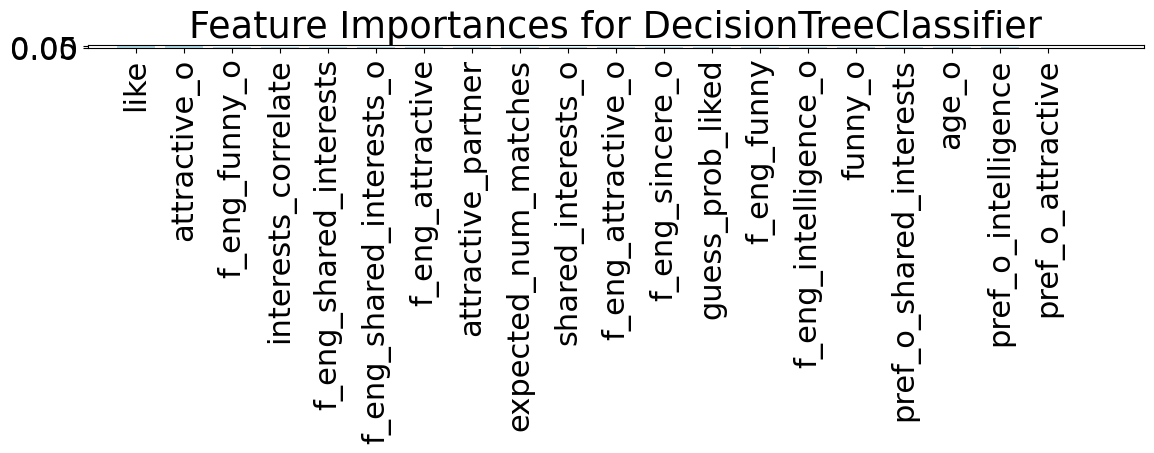

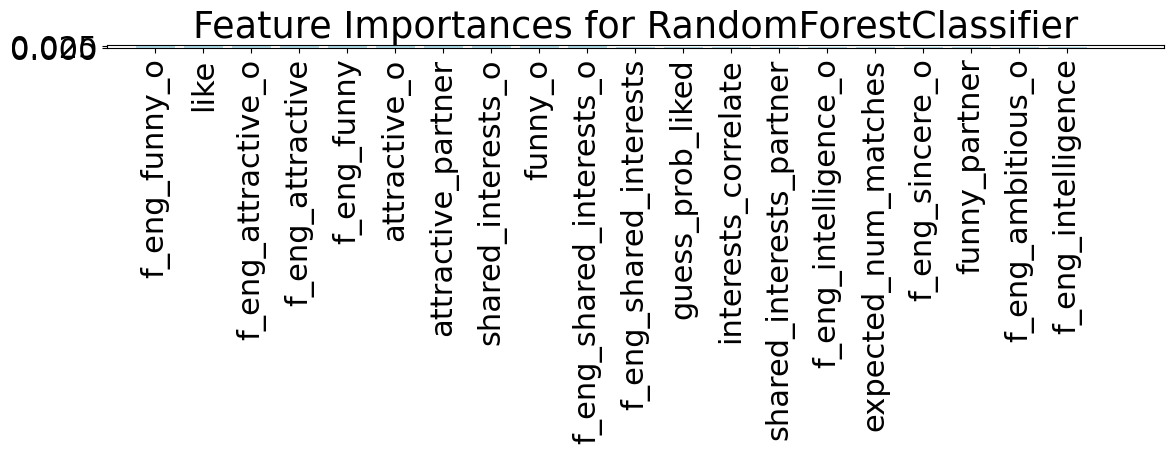

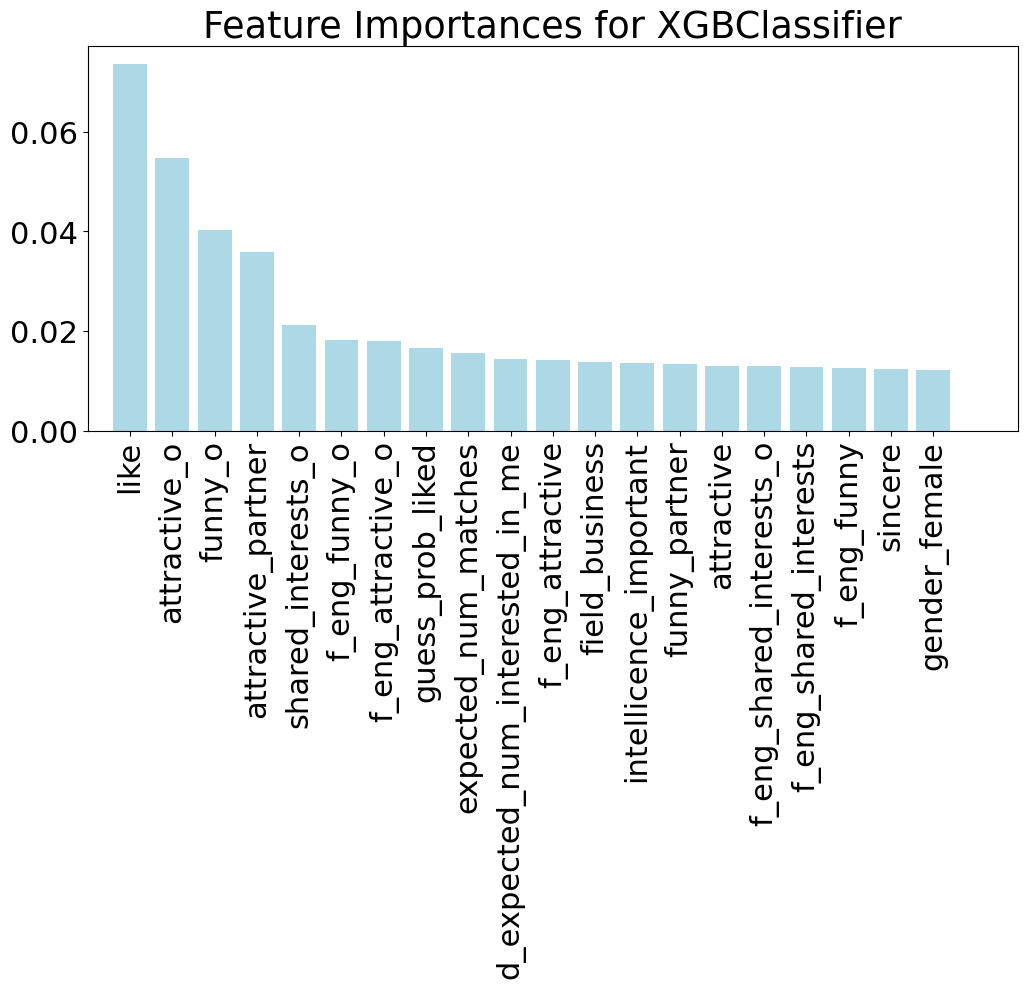

In [74]:
from src.modelling.ensemble_cv import plot_mean_feature_importances, plot_top_feature_importances

#     
best_features = plot_top_feature_importances(clf_comp_Full_FeatureSet, mean_feature_importances, X_data=X_train)

In [18]:
best_features

{'attractive',
 'attractive_o',
 'attractive_partner',
 'clubbing',
 'd_age',
 'expected_num_matches',
 'f_eng_ambitious_o',
 'f_eng_attractive',
 'f_eng_attractive_o',
 'f_eng_funny',
 'f_eng_funny_o',
 'f_eng_intelligence',
 'f_eng_intelligence_o',
 'f_eng_shared_interests',
 'f_eng_shared_interests_o',
 'f_eng_sincere_o',
 'field_business',
 'field_environmental science',
 'field_sociology',
 'funny_o',
 'funny_partner',
 'guess_prob_liked',
 'intellicence_important',
 'interests_correlate',
 'like',
 'pref_o_attractive',
 'pref_o_intelligence',
 'pref_o_shared_interests',
 'race_European/Caucasian-American',
 'race_Other',
 'shared_interests_o',
 'shared_interests_partner'}

In [ ]:
# 
X = df[best_features]
y = df['match']

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y, 
    test_size=0.25,
    random_state=42
)

In [19]:
# 
clf_comp_Greedy_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(
    classifiers=classifier_list, 
    X_data=X_train, 
    y_data=y_train
)

# display the comparison results
clf_comp_Greedy_FeatureSet

/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.854764   
1               SGDClassifier             0.853099   
2      DecisionTreeClassifier             1.000000   
3      RandomForestClassifier             0.999981   
4                         SVC             0.862285   
5               XGBClassifier             0.999476   
6  GradientBoostingClassifier             0.889955   
7          AdaBoostClassifier             1.000000   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.001793            0.851659   
1                           0.002324            0.848292   
2                           0.000000            0.786161   
3                           0.000056            0.857047   
4                           0.001628            0.854521   
5                           0.000287            0.856542   
6                           0.002095            0.861087   
7                           0.000000            0.783132   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.014644            0.413796   
1                          0.009155            0.391737   
2                          0.016405            0.401180   
3                          0.011197            0.408040   
4                          0.004946            0.341208   
5                          0.009656            0.491232   
6                          0.014972            0.477152   
7                          0.013202            0.397355   

   F1-Score Standard Deviation  
0                     0.056660  
1                     0.059917  
2                     0.039811  
3                     0.061260  
4                     0.023104  
5                     0.039834  
6                     0.063456  
7                     0.036628

## 3.3 Dimensionality Reduction via Recursive Feature Elimination (RFE)

In [20]:
from src.feature_selection.rfe import get_RFE_rankings

# load processed data and display DF summary
#df = pd.read_csv('./data/processed/scaled_oneHot.csv') # oneHot data
df = pd.read_csv('./data/processed/f_eng_preimpute_scaled_oneHot.csv')

NUMERICAL = [col for col in df.columns if df[col].dtype == 'float']
CATEGORICAL = [col for col in df.columns if df[col].dtype == 'object']

# full feature set list
full_training_feature_list = [col_name for col_name in df.columns if (col_name in min_variance_features) and (col_name not in ['has_null', 'wave', 'nulls_byRow', 'person_id', 'decision', 'decision_o', 'match'])]

# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X = df[full_training_feature_list]
y = df['match']

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y, 
    test_size=0.25,
    random_state=42
)

feature_rankings_RFE = get_RFE_rankings(classifiers=classifier_list, X_data=X_train, y_data=y_train, verbose=1)

feature_rankings_RFE

Now performing RFE for LogisticRegression


/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Now performing RFE for SGDClassifier
Now performing RFE for DecisionTreeClassifier
Now performing RFE for RandomForestClassifier
Skipped RFE for SVC
Now performing RFE for XGBClassifier
Now performing RFE for GradientBoostingClassifier
Skipped RFE for AdaBoostClassifier


Feature Name  Overall Ranking  LogisticRegression  \
115                          like                1                   2   
119              f_eng_attractive                2                   4   
28                   attractive_o                3                   3   
120                   f_eng_funny                4                   7   
33             shared_interests_o                5                   8   
..                            ...              ...                 ...   
92                     d_tvsports              127                 100   
70         d_intelligence_partner              128                  90   
36               d_intelligence_o              129                  97   
51   d_shared_interests_important              130                 120   
69              d_sincere_partner              131                 101   

     SGDClassifier  DecisionTreeClassifier  RandomForestClassifier  \
115              2                       5                       8   
119              7                       2                       2   
28               1                       6                      18   
120             15                      16                       5   
33               8                      20                      20   
..             ...                     ...                     ...   
92             121                      90                     117   
70             109                     112                     121   
36             103                     129                     106   
51             120                     114                     126   
69             110                     130                     108   

     XGBClassifier  GradientBoostingClassifier  
115              1                           1  
119              9                           4  
28               2                           2  
120             15                          10  
33              13                           6  
..             ...                         ...  
92              95                         129  
70             122                         119  
36             130                         114  
51             108                          97  
69             121                         121  

[131 rows x 8 columns]

In [26]:
feature_rankings_RFE.head(12)

Feature Name  Overall Ranking  LogisticRegression  SGDClassifier  \
115                like                1                   2              2   
119    f_eng_attractive                2                   4              7   
28         attractive_o                3                   3              1   
120         f_eng_funny                4                   7             15   
33   shared_interests_o                5                   8              8   
116    guess_prob_liked                6                  36              6   
62   attractive_partner                7                  22             17   
125  f_eng_attractive_o                8                  40             19   
126       f_eng_funny_o                9                  69              4   
31              funny_o               10                   1             36   
128     f_eng_sincere_o               11                  41             28   
9                 d_age               12                  12             20   

     DecisionTreeClassifier  RandomForestClassifier  XGBClassifier  \
115                       5                       8              1   
119                       2                       2              9   
28                        6                      18              2   
120                      16                       5             15   
33                       20                      20             13   
116                      11                      12              6   
62                       18                      17              4   
125                      12                       3              7   
126                       3                       4              5   
31                       35                      15              3   
128                       9                      11             37   
9                        43                      33             23   

     GradientBoostingClassifier  
115                           1  
119                           4  
28                            2  
120                          10  
33                            6  
116                           9  
62                            8  
125                           5  
126                           7  
31                            3  
128                          22  
9                            20

In [22]:
pooled_train_accuracies = []
pooled_test_accuracies = []

# we'll start with the top 20 features and then iteratively drop the least important ones
for num_features in range(20, 0, -1): 
    
    print('Computing for top %s feature(s)...' % num_features)
    
    kept_features = feature_rankings_RFE['Feature Name'].iloc[:num_features]
    X_train_reduced = X_train[kept_features].copy()
    
    clf_comparison, _ = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                     X_data=X_train_reduced, 
                                                     y_data=y_train)
    
    pooled_train_accuracies.append(clf_comparison['Mean Train Accuracy'].mean())
    pooled_test_accuracies.append(clf_comparison['Mean Test Accuracy'].mean())

Computing for top 20 feature(s)...
Computing for top 19 feature(s)...
Computing for top 18 feature(s)...
Computing for top 17 feature(s)...
Computing for top 16 feature(s)...
Computing for top 15 feature(s)...
Computing for top 14 feature(s)...
Computing for top 13 feature(s)...
Computing for top 12 feature(s)...
Computing for top 11 feature(s)...
Computing for top 10 feature(s)...
Computing for top 9 feature(s)...
Computing for top 8 feature(s)...
Computing for top 7 feature(s)...
Computing for top 6 feature(s)...
Computing for top 5 feature(s)...
Computing for top 4 feature(s)...
Computing for top 3 feature(s)...
Computing for top 2 feature(s)...
Computing for top 1 feature(s)...


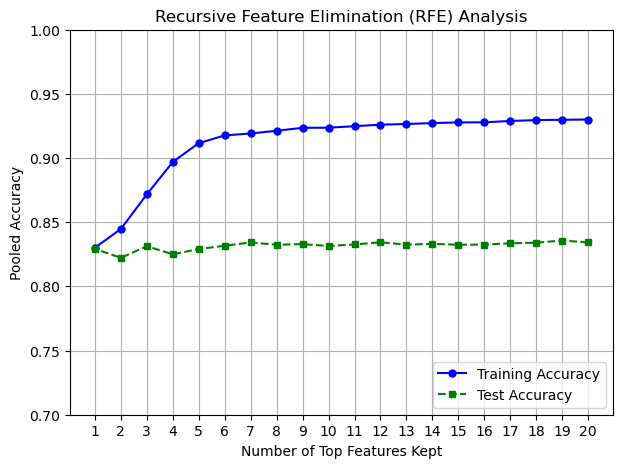

In [25]:
plt.figure(figsize=(7, 5))
plt.plot(range(20, 0, -1), pooled_train_accuracies, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(range(20, 0, -1), pooled_test_accuracies, color='green', linestyle='--', marker='s', markersize=5, label='Test Accuracy')
plt.title('Recursive Feature Elimination (RFE) Analysis')
plt.xlabel('Number of Top Features Kept')
plt.ylabel('Pooled Accuracy')
plt.legend(loc=4)
plt.ylim([0.7, 1])
plt.xticks(range(20, 0, -1))
plt.grid()
plt.show()

In [27]:
feature_subset_RFE = feature_rankings_RFE['Feature Name'].iloc[:12]

clf_comp_RFE_FeatureSet, _ = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                         X_data=X_train[feature_subset_RFE], 
                                                         y_data=y_train)

# display the comparison results
clf_comp_RFE_FeatureSet

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.851116   
1               SGDClassifier             0.848160   
2      DecisionTreeClassifier             1.000000   
3      RandomForestClassifier             1.000000   
4                         SVC             0.850068   
5               XGBClassifier             0.983630   
6  GradientBoostingClassifier             0.875194   
7          AdaBoostClassifier             1.000000   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.001963            0.850481   
1                           0.002327            0.845599   
2                           0.000000            0.790541   
3                           0.000000            0.853007   
4                           0.001498            0.847449   
5                           0.002076            0.846944   
6                           0.001983            0.855531   
7                           0.000000            0.785321   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.012675            0.391931   
1                          0.011267            0.345130   
2                          0.012505            0.401006   
3                          0.014309            0.416350   
4                          0.006029            0.262562   
5                          0.014969            0.442173   
6                          0.013018            0.447299   
7                          0.013715            0.393544   

   F1-Score Standard Deviation  
0                     0.056340  
1                     0.042432  
2                     0.034482  
3                     0.068114  
4                     0.041505  
5                     0.066254  
6                     0.061324  
7                     0.040078

## 3.4 Dimensionality Reduction via Principal Component Analysis (PCA)

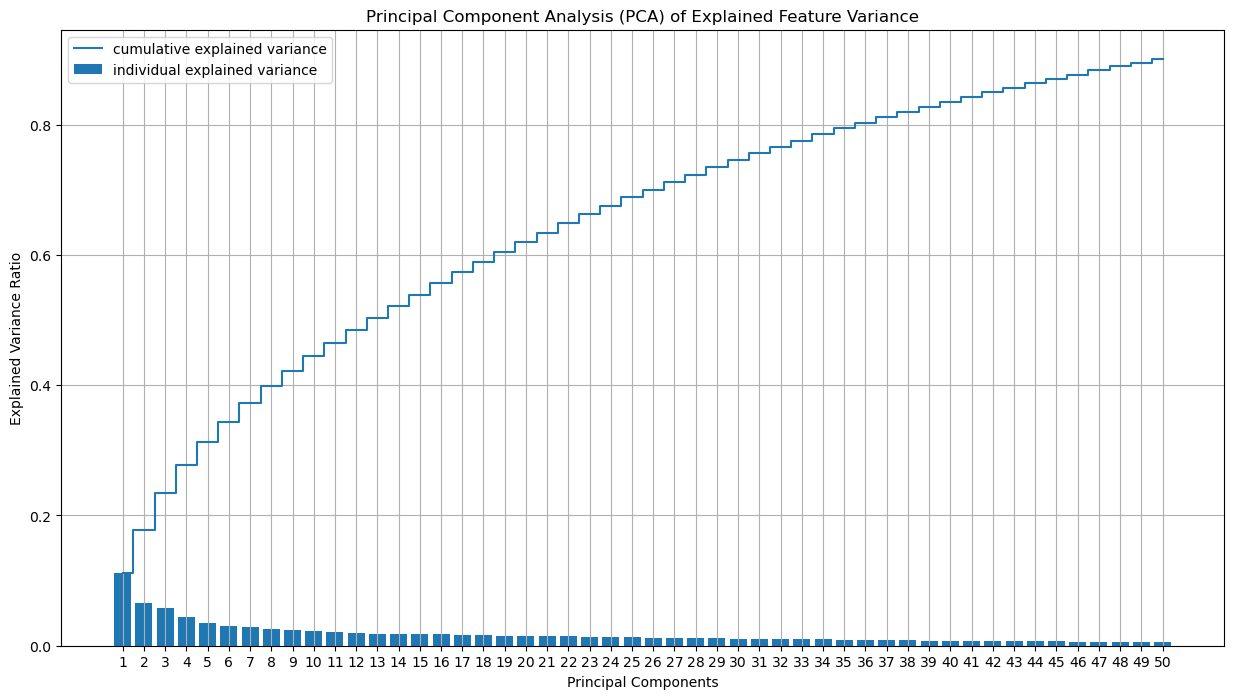

In [29]:
# performing PCA and retain the top ** principal components:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)

X_train_pca = pca.fit_transform(X_train)

pca_components = pca.components_
pca_var_ratios = pca.explained_variance_ratio_

plt.figure(figsize=(15, 8))
plt.bar(range(1, pca_var_ratios.size +1), pca_var_ratios, align='center', label='individual explained variance')
plt.step(range(1, pca_var_ratios.size +1), np.cumsum(pca_var_ratios), where='mid', label='cumulative explained variance')
plt.title('Principal Component Analysis (PCA) of Explained Feature Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.xticks(range(1, pca_var_ratios.size +1))
plt.legend(loc='best')
plt.grid()
plt.show()

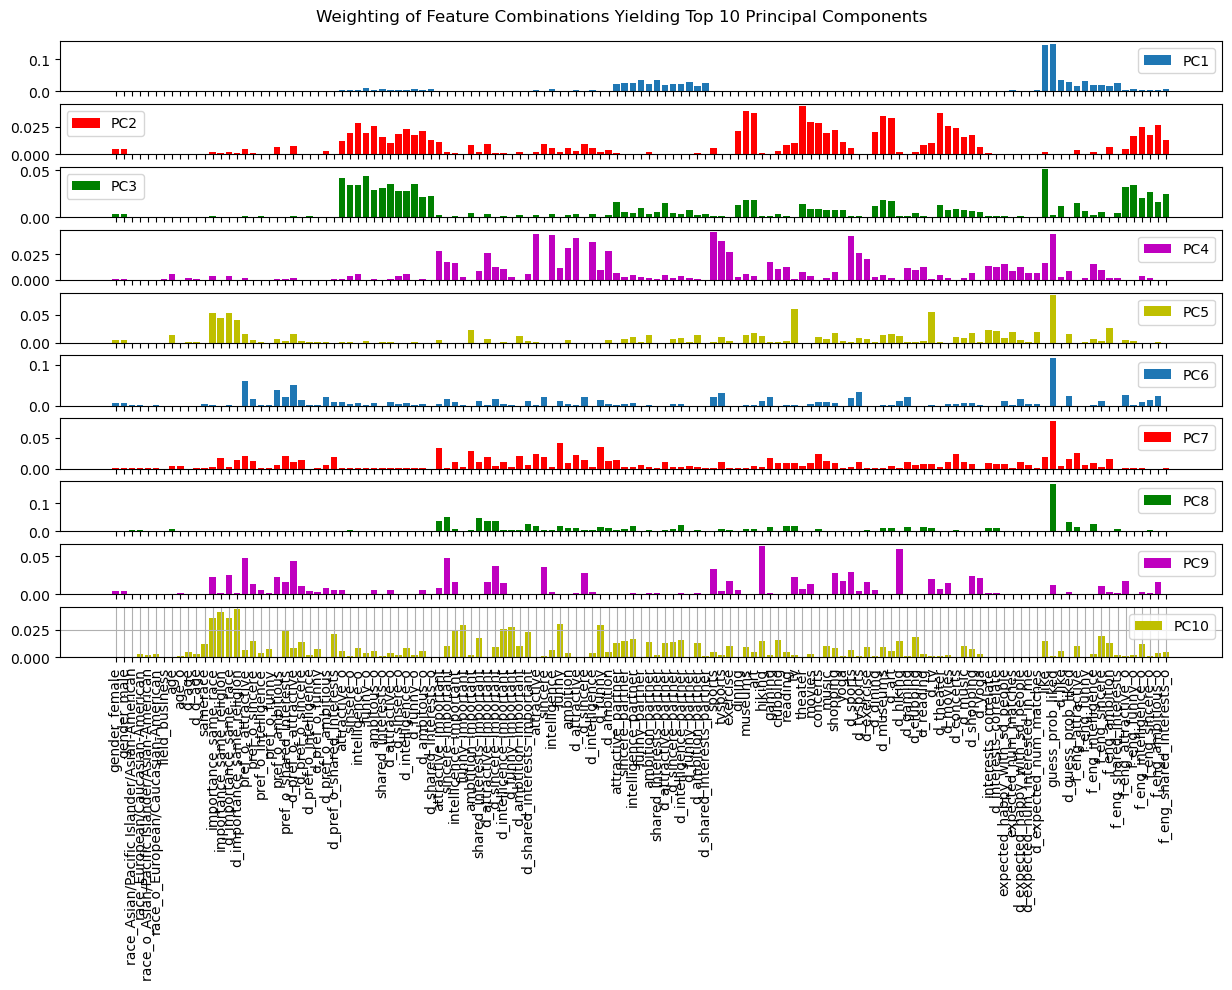

In [39]:
f, axarr = plt.subplots(10, sharex=True, figsize=(15,8))
plt.grid()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.25)
axarr[0].bar(range(1, pca_components[0].size + 1), pca_components[0]**2, 
             align='center', label='PC1')
axarr[0].legend(loc='best')
axarr[1].bar(range(1, pca_components[1].size + 1), pca_components[1]**2, 
             align='center', label='PC2', color='r')
axarr[1].legend(loc='best')
axarr[2].bar(range(1, pca_components[2].size + 1), pca_components[2]**2, 
             align='center', label='PC3', color='g')
axarr[2].legend(loc='best')
axarr[3].bar(range(1, pca_components[3].size + 1), pca_components[3]**2, 
             align='center', label='PC4', color='m')
axarr[3].legend(loc='best')
axarr[4].bar(range(1, pca_components[4].size + 1), pca_components[4]**2, 
             align='center', label='PC5', color='y')
axarr[4].legend(loc='best')
axarr[5].bar(range(1, pca_components[5].size + 1), pca_components[5]**2, 
             align='center', label='PC6')
axarr[5].legend(loc='best')
axarr[6].bar(range(1, pca_components[6].size + 1), pca_components[6]**2, 
             align='center', label='PC7', color='r')
axarr[6].legend(loc='best')
axarr[7].bar(range(1, pca_components[7].size + 1), pca_components[7]**2, 
             align='center', label='PC8', color='g')
axarr[7].legend(loc='best')
axarr[8].bar(range(1, pca_components[8].size + 1), pca_components[8]**2, 
             align='center', label='PC9', color='m')
axarr[8].legend(loc='best')
axarr[9].bar(range(1, pca_components[9].size + 1), pca_components[9]**2, 
             align='center', label='PC10', color='y')
axarr[9].legend(loc='best')
plt.xticks(np.arange(1.0, pca_components[0].size +1.0), X_train.columns, rotation=90)
plt.suptitle('Weighting of Feature Combinations Yielding Top 10 Principal Components', y=0.92)
plt.show()

## 3.5 Best Features from EDA

In [40]:
# 
best_features_EDA = ['like', 'funny_o', 'funny_partner', 'shared_interests_o', 'shared_interests_partner', 'attractive_o', 'attractive_partner', 'guess_prob_liked']

# 
X = df[best_features_EDA]
y = df['match']

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y, 
    test_size=0.25,
    random_state=42
)

clf_comp_EDA_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(
    classifiers=classifier_list, 
    X_data=X_train, 
    y_data=y_train
)

# display the comparison results
clf_comp_EDA_FeatureSet

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.848441   
1               SGDClassifier             0.848834   
2      DecisionTreeClassifier             0.997699   
3      RandomForestClassifier             0.997680   
4                         SVC             0.849208   
5               XGBClassifier             0.937812   
6  GradientBoostingClassifier             0.866046   
7          AdaBoostClassifier             0.997699   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.001250            0.847619   
1                           0.002163            0.846946   
2                           0.000345            0.790869   
3                           0.000337            0.843409   
4                           0.001531            0.849469   
5                           0.002205            0.837682   
6                           0.002096            0.852164   
7                           0.000345            0.831120   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.011330            0.381668   
1                          0.011157            0.319555   
2                          0.015292            0.403782   
3                          0.011253            0.396743   
4                          0.006747            0.277600   
5                          0.014865            0.415231   
6                          0.012299            0.441721   
7                          0.013702            0.411298   

   F1-Score Standard Deviation  
0                     0.049878  
1                     0.045310  
2                     0.029476  
3                     0.045713  
4                     0.034274  
5                     0.061303  
6                     0.058024  
7                     0.032933

## 3.6 Summary of Results

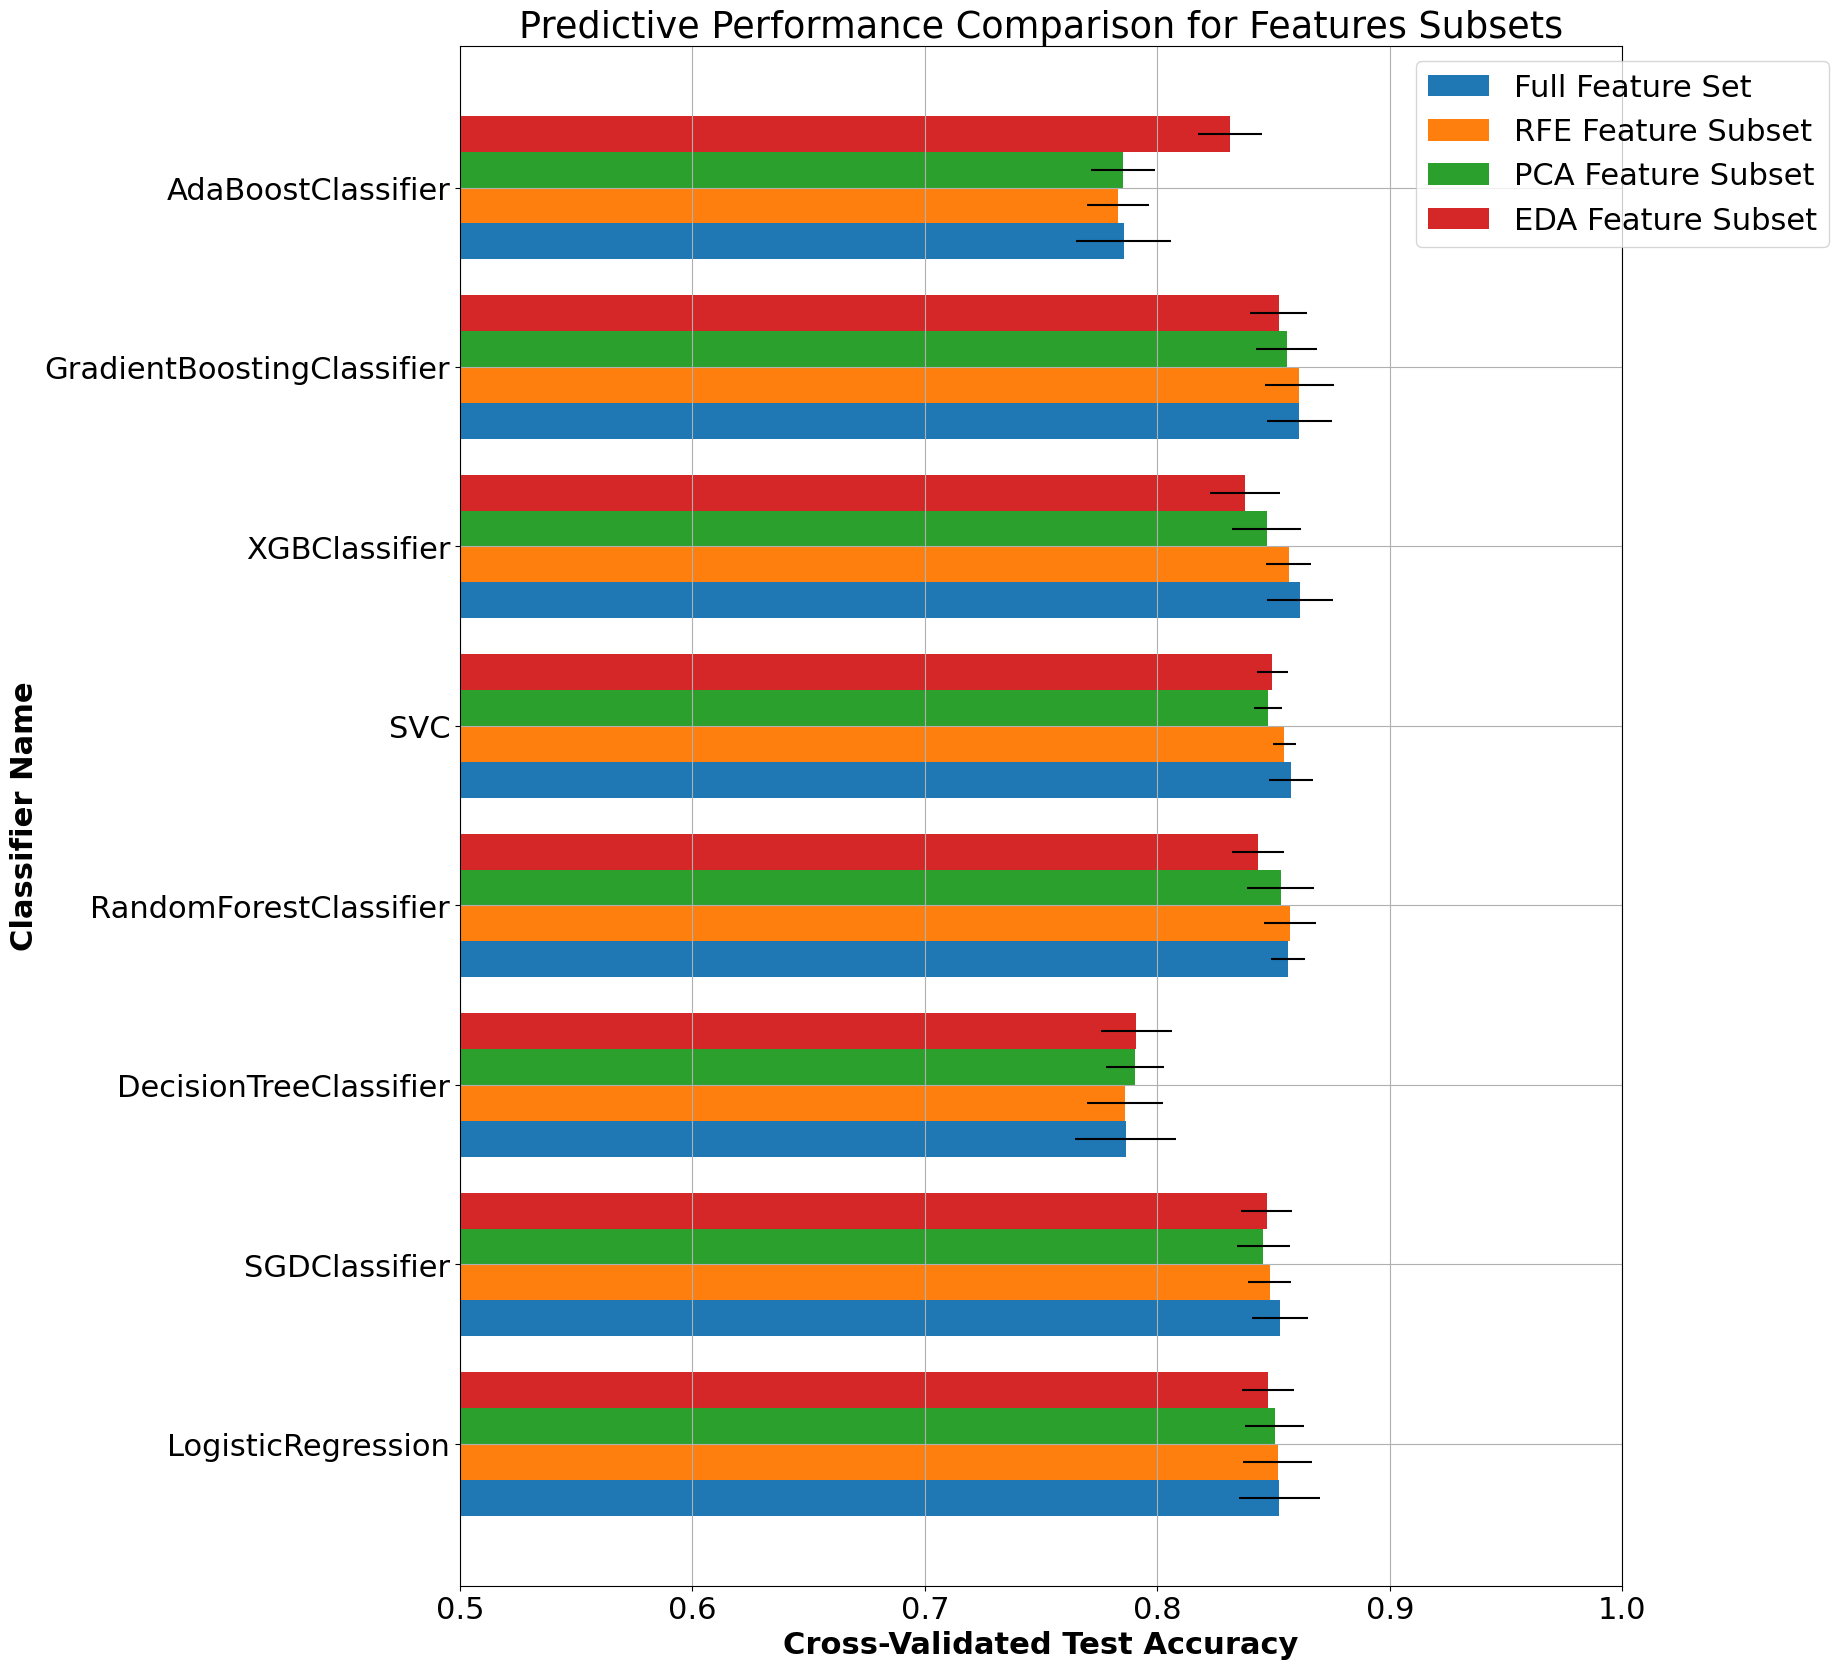

In [42]:
import matplotlib 

# plot the mean cross-validated test accuracies for each feature subset:
matplotlib.style.use('default')
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(15,20))
width = 0.20
y_position = np.arange(1, clf_comp_Full_FeatureSet['Classifier Name'].shape[0] + 1)

ax.barh(y_position, clf_comp_Full_FeatureSet['Mean Test Accuracy'], width,
        xerr=clf_comp_Full_FeatureSet['Test Accuracy Standard Deviation'], 
        align='center', ecolor='black', label='Full Feature Set')

ax.barh(y_position + width, clf_comp_Greedy_FeatureSet['Mean Test Accuracy'], width,
        xerr=clf_comp_Greedy_FeatureSet['Test Accuracy Standard Deviation'], 
        align='center', ecolor='black', label='RFE Feature Subset')

ax.barh(y_position + 2*width, clf_comp_RFE_FeatureSet['Mean Test Accuracy'], width,
        xerr=clf_comp_RFE_FeatureSet['Test Accuracy Standard Deviation'], 
        align='center', ecolor='black', label='PCA Feature Subset')

ax.barh(y_position + 3*width, clf_comp_EDA_FeatureSet['Mean Test Accuracy'], width,
        xerr=clf_comp_EDA_FeatureSet['Test Accuracy Standard Deviation'], 
        align='center', ecolor='black', label='EDA Feature Subset')

ax.set_xlim([0.5, 1.0])
ax.set_xlabel('Cross-Validated Test Accuracy', fontweight='bold')

ax.set_yticks(y_position + 1.5*width)
ax.set_yticklabels(clf_comp_Full_FeatureSet['Classifier Name'].values)
ax.set_ylabel('Classifier Name', fontweight='bold')

ax.legend(loc=9, bbox_to_anchor=(1.0, 1.0))

plt.title('Predictive Performance Comparison for Features Subsets')
plt.grid()
plt.show()

---

# 4. Modelling <a class="anchor" id="modelling"></a>


In [86]:
# load processed data and display DF summary
df = pd.read_csv('./data/processed/processed_oneHot.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102 entries, 0 to 8101
Columns: 158 entries, gender_female to nulls_byRow
dtypes: float64(158)
memory usage: 9.8 MB


In [87]:
df.describe()

gender_female  gender_male  race_Asian/Pacific Islander/Asian-American  \
count    8102.000000  8102.000000                                 8102.000000   
mean        0.497778     0.502222                                    0.239570   
std         0.500026     0.500026                                    0.426848   
min         0.000000     0.000000                                    0.000000   
25%         0.000000     0.000000                                    0.000000   
50%         0.000000     1.000000                                    0.000000   
75%         1.000000     1.000000                                    0.000000   
max         1.000000     1.000000                                    1.000000   

       race_Black/African American  race_European/Caucasian-American  \
count                  8102.000000                       8102.000000   
mean                      0.050852                          0.567020   
std                       0.219708                          0.495518   
min                       0.000000                          0.000000   
25%                       0.000000                          0.000000   
50%                       0.000000                          1.000000   
75%                       0.000000                          1.000000   
max                       1.000000                          1.000000   

       race_Latino/Hispanic American   race_Other     race_o_?  \
count                    8102.000000  8102.000000  8102.000000   
mean                        0.079857     0.062701     0.005801   
std                         0.271088     0.242439     0.075948   
min                         0.000000     0.000000     0.000000   
25%                         0.000000     0.000000     0.000000   
50%                         0.000000     0.000000     0.000000   
75%                         0.000000     0.000000     0.000000   
max                         1.000000     1.000000     1.000000   

       race_o_Asian/Pacific Islander/Asian-American  \
count                                   8102.000000   
mean                                       0.236979   
std                                        0.425255   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                        1.000000   

       race_o_Black/African American  race_o_European/Caucasian-American  \
count                    8102.000000                         8102.000000   
mean                        0.050235                            0.564922   
std                         0.218442                            0.495798   
min                         0.000000                            0.000000   
25%                         0.000000                            0.000000   
50%                         0.000000                            1.000000   
75%                         0.000000                            1.000000   
max                         1.000000                            1.000000   

       race_o_Latino/Hispanic American  race_o_Other  field_anthropology  \
count                      8102.000000   8102.000000         8102.000000   
mean                          0.079240      0.062824            0.003826   
std                           0.270129      0.242661            0.061742   
min                           0.000000      0.000000            0.000000   
25%                           0.000000      0.000000            0.000000   
50%                           0.000000      0.000000            0.000000   
75%                           0.000000      0.000000            0.000000   
max                           1.000000      1.000000            1.000000   

       field_architecture    field_art  field_biology  field_business  \
count         8102.000000  8102.000000    8102.000000     8102.000000   
mean             0.00

In [88]:
from sklearn.model_selection import train_test_split

# full feature set list
training_feature_list = [col_name for col_name in df.columns if col_name not in ['has_null', 'wave', 'nulls_byRow', 'person_id', 'decision', 'decision_o', 'match']]

# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X = df[training_feature_list]
y = df['match']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y, 
    test_size=0.25
)

In [91]:
clf_comp_Full_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                                                 X_data=X_train, 
                                                                                 y_data=y_train)

# display the comparison results
clf_comp_Full_FeatureSet

/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.863799   
1               SGDClassifier             0.834101   
2      DecisionTreeClassifier             1.000000   
3         ExtraTreeClassifier             0.835162   
4      RandomForestClassifier             0.999963   
5                         SVC             0.831797   
6               XGBClassifier             1.000000   
7  GradientBoostingClassifier             0.890169   
8          AdaBoostClassifier             1.000000   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.001925            0.853189   
1                           0.032928            0.823246   
2                           0.000000            0.793613   
3                           0.001769            0.831468   
4                           0.000073            0.854344   
5                           0.000068            0.831797   
6                           0.000000            0.858460   
7                           0.001688            0.859778   
8                           0.000000            0.791968   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.008420            0.427599   
1                          0.038967            0.395151   
2                          0.009009            0.395435   
3                          0.004879            0.079263   
4                          0.008085            0.337420   
5                          0.000615            0.000000   
6                          0.007170            0.488010   
7                          0.007644            0.449017   
8                          0.010645            0.394861   

   F1-Score Standard Deviation  
0                     0.046338  
1                     0.139672  
2                     0.027060  
3                     0.062005  
4                     0.053464  
5                     0.000000  
6                     0.033361  
7                     0.042052  
8                     0.025389

In [114]:
# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X = df[best_features]
y = df['match']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y, 
    test_size=0.25
)

clf_comp_Full_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(
    classifiers=classifier_list, 
    X_data=X_train, 
    y_data=y_train
)

# display the comparison results
clf_comp_Full_FeatureSet

/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.850432   
1               SGDClassifier             0.848018   
2      DecisionTreeClassifier             1.000000   
3         ExtraTreeClassifier             0.840008   
4      RandomForestClassifier             0.999927   
5                         SVC             0.833608   
6               XGBClassifier             0.992191   
7  GradientBoostingClassifier             0.878118   
8          AdaBoostClassifier             1.000000   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.002186            0.849081   
1                           0.004819            0.845292   
2                           0.000000            0.789173   
3                           0.003257            0.833281   
4                           0.000168            0.857637   
5                           0.000793            0.832949   
6                           0.001508            0.852702   
7                           0.001294            0.857146   
8                           0.000000            0.791641   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.009531            0.388814   
1                          0.007832            0.311942   
2                          0.015388            0.405968   
3                          0.007072            0.235303   
4                          0.008001            0.416180   
5                          0.002118            0.022544   
6                          0.009975            0.473545   
7                          0.005707            0.447138   
8                          0.010911            0.411480   

   F1-Score Standard Deviation  
0                     0.031319  
1                     0.108119  
2                     0.028150  
3                     0.076169  
4                     0.032699  
5                     0.028504  
6                     0.053215  
7                     0.026792  
8                     0.022787

In [70]:
clf_comp_Full_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                                                 X_data=X_train, 
                                                                                 y_data=y_train)

# display the comparison results
clf_comp_Full_FeatureSet

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.846536   
1               SGDClassifier             0.846811   
2      DecisionTreeClassifier             0.909078   
3         ExtraTreeClassifier             0.837576   
4      RandomForestClassifier             0.909078   
5                         SVC             0.847743   
6               XGBClassifier             0.880166   
7  GradientBoostingClassifier             0.856576   
8          AdaBoostClassifier             0.909078   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.001515            0.846279   
1                           0.001585            0.848088   
2                           0.001153            0.820445   
3                           0.003213            0.837721   
4                           0.001153            0.828014   
5                           0.000879            0.847100   
6                           0.002100            0.839698   
7                           0.001266            0.849079   
8                           0.001153            0.825710   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.009508            0.333872   
1                          0.011654            0.378574   
2                          0.012950            0.354620   
3                          0.012509            0.315782   
4                          0.013030            0.382199   
5                          0.006639            0.284851   
6                          0.010963            0.389374   
7                          0.011105            0.408341   
8                          0.012422            0.395570   

   F1-Score Standard Deviation  
0                     0.046667  
1                     0.072467  
2                     0.049144  
3                     0.143187  
4                     0.049105  
5                     0.041841  
6                     0.054281  
7                     0.043050  
8                     0.047560

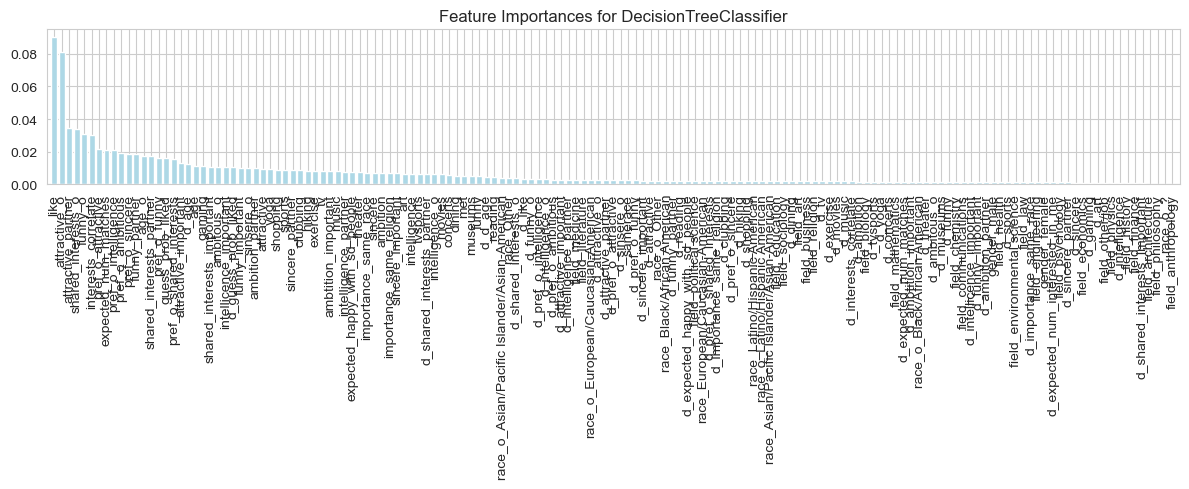

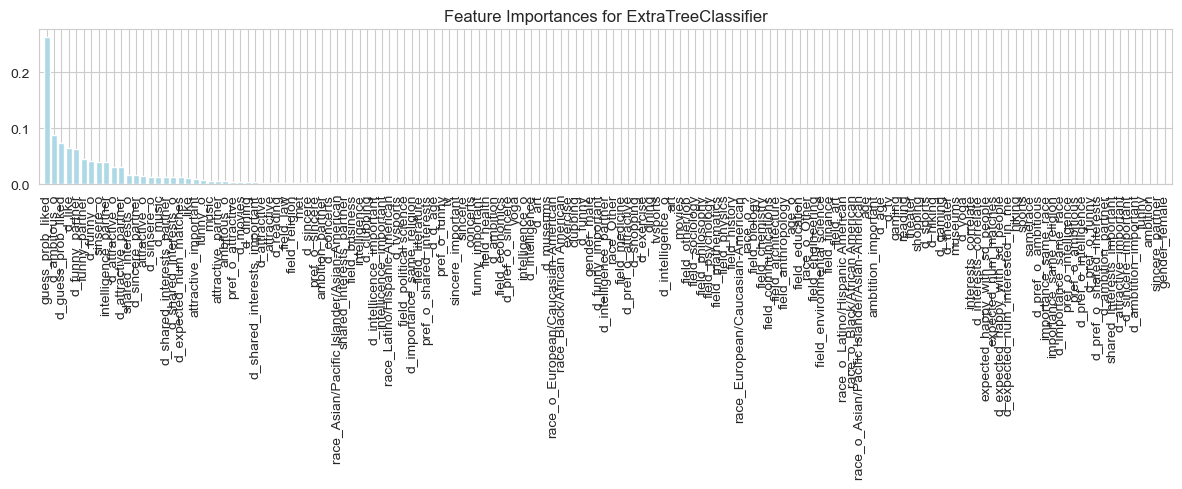

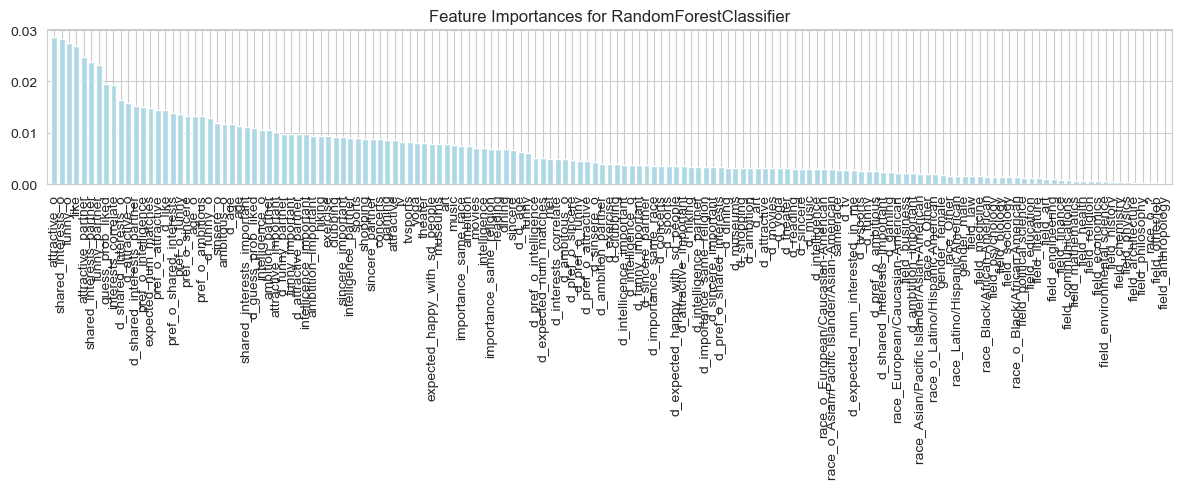

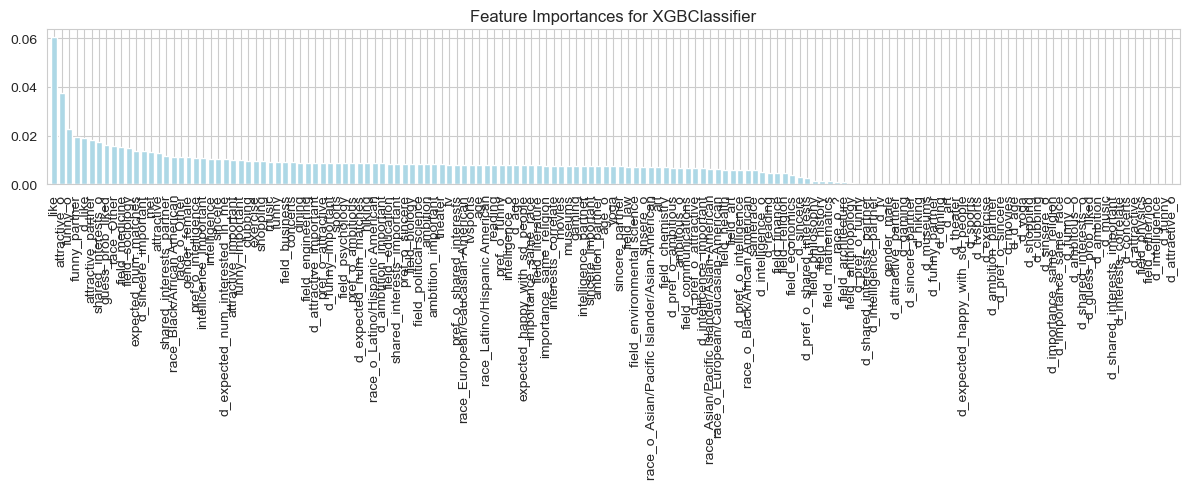

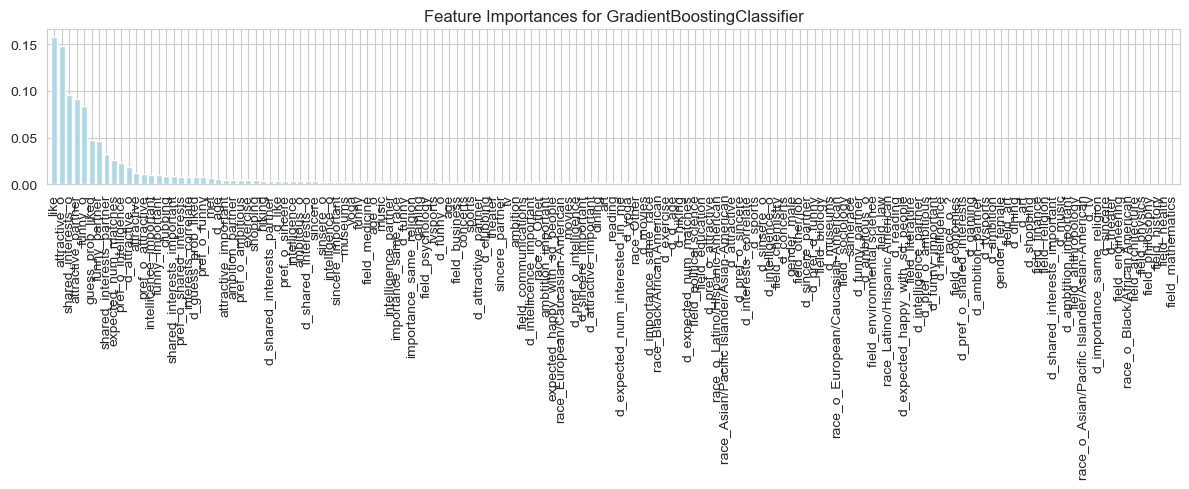

In [113]:
plot_mean_feature_importances(clf_comp_Full_FeatureSet, mean_feature_importances, X_data=X_train)

## 4.1 Logistic Regression
- Preprocessing
    - Remove outliers
    - Remove multicollinearity
    - Assert linear assumption
        - log transform
    - Assert normal distribution
        - BoxCox
    - Normalization & Standardization
    - Regularization
    - Beware of perfect predictor attributes
- Evaluation
    - ROC AUC
    - Hosmer-Lemeshow GOF test

In [71]:
# checking for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = df[NUMERICAL].columns
vif_data["VIF"] = [variance_inflation_factor(df[NUMERICAL].values, i) for i in range(len(df[NUMERICAL].columns))]

feature          VIF
114                              met     1.104698
6                           samerace     1.831182
108  d_expected_num_interested_in_me     2.221694
21                d_pref_o_ambitious     2.687868
117                            match     2.938539
..                               ...          ...
83                             music   177.217429
48                           sincere   205.889591
50                             funny   308.402131
118                        person_id  1133.288790
1                               wave  1238.298971

[120 rows x 2 columns]

In [74]:
vif_data.sort_values(by='VIF').tail(20)

feature          VIF
35   attractive_important    98.475844
13    pref_o_intelligence    99.658842
11      pref_o_attractive   100.143687
24              sinsere_o   106.382742
58        sincere_partner   108.650577
74                    art   118.071452
78                reading   124.348103
47             attractive   139.466741
25         intelligence_o   144.186283
59   intelligence_partner   145.552983
51               ambition   150.355013
73                museums   152.667830
72                 dining   155.735037
49           intelligence   159.511488
81                 movies   162.677269
83                  music   177.217429
48                sincere   205.889591
50                  funny   308.402131
118             person_id  1133.288790
1                    wave  1238.298971

In [73]:
vif_data.sort_values(by='VIF').head(20)

feature       VIF
114                              met  1.104698
6                           samerace  1.831182
108  d_expected_num_interested_in_me  2.221694
21                d_pref_o_ambitious  2.687868
117                            match  2.938539
45             d_ambtition_important  3.009083
22         d_pref_o_shared_interests  3.368409
119                      nulls_byRow  3.675773
116                       decision_o  3.783822
46      d_shared_interests_important  3.824855
115                         decision  4.145482
93                          d_gaming  5.350209
104            d_interests_correlate  6.523311
4                              d_age  6.732957
17               d_pref_o_attractive  6.852498
34              d_shared_interests_o  7.263626
68        d_shared_interests_partner  7.434612
41            d_attractive_important  7.743924
5                            d_d_age  7.836089
102                           d_yoga  8.047211

#### Preparing the data for Logistic Regression

The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

Much study has gone into defining these assumptions and precise probabilistic and statistical language is used. My advice is to use these as guidelines or rules of thumb and experiment with different data preparation schemes.

Ultimately in predictive modeling machine learning projects you are laser focused on making accurate predictions rather than interpreting the results. As such, you can break some assumptions as long as the model is robust and performs well.

- **Binary Output Variable:** This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- **Remove Noise:** Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- **Gaussian Distribution:** Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- **Remove Correlated Inputs:** Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- **Fail to Converge:** It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

## 2.2 Naive Bayes
- Preprocessing
    - Same as for Logistic Regression...
    - retrain the model with new data
    - eliminate zero observations
    - remove correlated features
    - use the log probabilities in calculations
    - Handle continuous variables
        - discretize 
    
- Evaluation 

## 2.3 Linear Discriminant Analysis

This analysis is used when there are a lot of variables to consider (e.g., expression of thousands of proteins). LDA makes a lot of assumptions, such as: 

1. sample measurements are independent from each other
2. distributions are normal
3. co-variance of the measurements are identical across different classes

Therefore, LDA will not be accurate if the data do not follow these criteria. Unlike LDA, the support vector machine (SVM) model does not assume anything about data distribution.

## 2.4 Support Vector Machines
- preprocessing
    - scale all 
        - [0,1] vs. [-1,1]
- Explore The Parzen classifier
- KERNEL SELECTION!!!

## 2.5 K-Nearest Neighbors

## 2.6 Tree-based Modelling

In [ ]:
from src.modelling.test import *

classifier_list = [DecisionTreeClassifier(), 
                   AdaBoostClassifier(), 
                   GradientBoostingClassifier(), 
                   XGBClassifier(), 
                   RandomForestClassifier(),
                   ExtraTreesClassifier()]

X_train = pd.read_csv('../data/modelling/train/X_train.csv')
y_train = pd.read_csv('../data/modelling/train/y_train.csv')
y_train = y_train['match']
train = pd.concat([X_train, y_train], axis=1)

downsampled_train = pd.read_csv('../data/modelling/train/downsampled_train.csv')
upsampled_train = pd.read_csv('../data/modelling/train/upsampled_train.csv')
oversampled_train = pd.read_csv('../data/modelling/train/oversampled_sm_train.csv')

columns = list(upsampled_train.columns)
columns.remove('match')
X_train_downsampled = downsampled_train[columns]
y_train_downsampled = downsampled_train['match']
X_train_upsampled = upsampled_train[columns]
y_train_upsampled = upsampled_train['match']
X_train_oversampled_sm = oversampled_train[columns]
y_train_oversampled_sm = oversampled_train['match']

X_test= pd.read_csv('./data/modelling/test/X_test.csv')
y_test = pd.read_csv('./data/modelling/test/y_test.csv')
y_test = y_test['match']

X_val = pd.read_csv('./data/modelling/validation/X_val.csv')
y_val = pd.read_csv('./data/modelling/validation/y_val.csv')
y_val = y_val['match']